In [1]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# 데이터 프레임 생성
data_path = os.path.join(os.path.curdir, '..\..\Dataset\gutekueche_cocktail_reviews.json')
df = pd.read_json(data_path, encoding='utf-8')
df

,Cocktail,User,Review,Timestamp
0,1,Maarja,Sauermilch ist ja gar nicht so leicht zu bekom...,am 07.11.2022 um 19:08 Uhr
1,1,Katerchen,"Die Sauermilch lasse ich weg, nehme Joghurt st...",am 06.02.2022 um 11:41 Uhr
2,1,alpenkoch,Der frische Erdbeer-Sauermilchcocktail sieht a...,am 09.03.2021 um 13:22 Uhr
3,1,snakeeleven,Mit den letzten Erbeeren werde ich heute diese...,am 12.07.2019 um 09:52 Uhr
4,1,Silviatempelmayr,"Statt der sauermilch nehme ich Buttermilch, de...",am 13.07.2018 um 22:08 Uhr
...,...,...,...,...
2163,828,xblue,Der Absinth Maracuja Cocktail am Foto ist ein ...,am 08.02.2021 um 14:24 Uhr
2164,828,Heinrich45,Ganz böses Getränk. Trinkt sich wie eine Apfel...,am 08.01.2020 um 19:44 Uhr
2165,829,snakeeleven,"Cassandra das ist eine gute Idee von Dir, aber...",am 29.11.2019 um 13:54 Uhr
2166,829,Maisi,Durch die Farbe von Fanta und wahrscheinlich a...,am 25.04.2019 um 07:57 Uhr


In [73]:
users = list(set(df['User']))
print(len(users))
    

130


In [74]:
# Utility Matrix 생성
df['HasReview'] = 1
utility_matrix = df.pivot_table(index='Cocktail', columns='User', values='HasReview', aggfunc='count', fill_value=0)
utility_matrix
    

User,-michi-,AMMER,Andreawowa,Anna-111,Artelsmair,Babsi45,Billie-Blue,Cheesy,ChristineKlotz,ChuChu690,...,sgr1909,snakeeleven,spicy-orange,sssumsi,tamixpanda,tine13,verena_w,wald-sophie,wyoimi,xblue
Cocktail,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


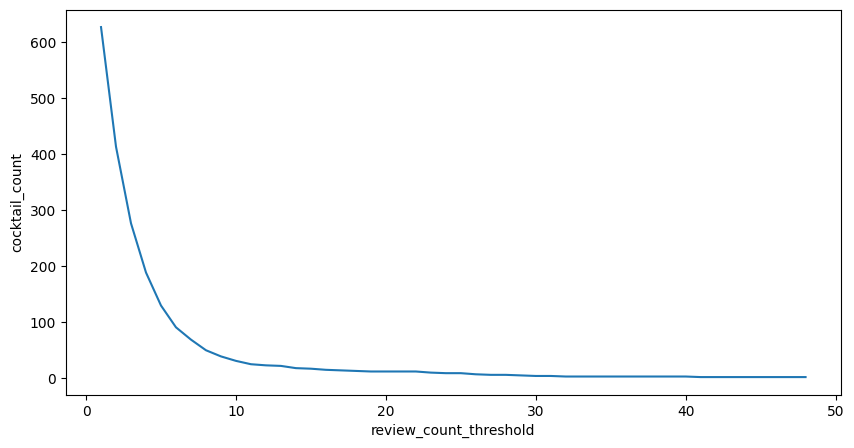

,리뷰 n개 이상,칵테일 수
0,1,627
1,2,413
2,3,276
3,4,188
4,5,129
5,6,90
6,7,68
7,8,49
8,9,38
9,10,30


In [128]:
review_count = utility_matrix.sum(axis=1)
review_count_threshold_list = []
review_count_list = []
# review_count 별 cocktail 개수
for review_count_threshold in range(1, max(review_count)+1):
    #print(review_count_threshold, review_count[review_count >= review_count_threshold].count())
    review_count_threshold_list.append(review_count_threshold)
    review_count_list.append(review_count[review_count >= review_count_threshold].count())

# review_count 별 cocktail 개수 그래프
plt.figure(figsize=(10, 5))
plt.plot(review_count_threshold_list, review_count_list)
plt.xlabel('review_count_threshold')
plt.ylabel('cocktail_count')
plt.show()

# review_count 별 cocktail 개수 테이블
review_count_df = pd.DataFrame({"리뷰 n개 이상":review_count_threshold_list, "칵테일 수":review_count_list}, index=None)
review_count_df


    

In [132]:
cocktail_review_count_list = range(1, 8)
user_review_count_list = range(1, 4)

# Review Count가 n 이상인 칵테일만 남기기
for review_count_threshold in cocktail_review_count_list:
    cocktail_list = review_count[review_count >= review_count_threshold].index
    review_list = df[df['Cocktail'].isin(cocktail_list)]['Review'] # Review가 n개 이상인 Cocktail List에 속하는 Review만 남기기
    user_list = utility_matrix[utility_matrix.index.isin(cocktail_list)].columns # Review가 n개 이상인 Cocktail List에 속하는 User만 남기기
    print("리뷰가 N개 이상 달린 칵테일 레시피 수 : N = ", review_count_threshold, ", 칵테일 = ", len(cocktail_list))
    # Leaved Review Count가 m 이상인 유저만 남기기
    for review_leaved_threshold in user_review_count_list:
        user_list = user_list[utility_matrix.loc[cocktail_list, user_list].sum(axis=0) >= review_leaved_threshold]
        print("    리뷰를 M개 이상 남긴 유저 수 : M = ", review_leaved_threshold, ", 유저 = ", len(user_list))
    


리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  1 , 칵테일 =  627
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  130
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  75
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  58
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  2 , 칵테일 =  413
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  129
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  75
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  57
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  3 , 칵테일 =  276
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  126
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  74
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  57
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  4 , 칵테일 =  188
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  125
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  74
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  55
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  5 , 칵테일 =  129
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  124
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  72
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  54
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  6 , 칵테일 =  90
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  121
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  70
    리뷰를 M개 

In [142]:
# 각 조건 별로 Coctail List 보기
review_count_threshold = 4  # 2-> 413, 3-> 276, 4-> 188
cocktail_list = review_count[review_count >= review_count_threshold].index

cocktail_profiles = pd.read_json(os.path.join(os.path.curdir, '..\..\Dataset\gutekueche_cocktail_profiles.json'), encoding='utf-8')['cocktail_profiles']
cocktail_profiles = pd.DataFrame({'ID': [x['ID'] for x in cocktail_profiles], 
                                  'Name': [x['Name'] for x in cocktail_profiles],
                                  'AverageRating': [x['AverageRating'] for x in cocktail_profiles],
                                  'Description': [x['description'] for x in cocktail_profiles],
                                  'Ingredients': [x['Ingredients'] for x in cocktail_profiles],
                                  'Directions': [x['Directions'] for x in cocktail_profiles],
                                  'Keywords': [x['Keywords'] for x in cocktail_profiles],
                                  })
cocktail_profiles = cocktail_profiles[cocktail_profiles['ID'].isin(cocktail_list)]
cocktail_profiles

# JSON 파일로 저장
cocktail_profiles.to_json(os.path.join(os.path.curdir, '..\..\Dataset\gutekueche_cocktail_profiles_filtered_by_'+str(review_count_threshold)+'.json'), orient='records', force_ascii=False, indent=4)

## AllRecipe 전처리

In [109]:
# All Recipe Dataset에서 Cocktail List 추출

data_path = os.path.join(os.path.curdir, '..\\..\\Dataset\\all_recipe_cocktail_reviews.json')
df = pd.read_json(data_path, encoding='utf-8')["cocktail_reviews"]

df = pd.DataFrame({ 'Cocktail': [x['Cocktail'] for x in df],
                    'Name': [x['Name'] for x in df],
                    'User': [x['User'] for x in df],
                    'Review': [x['Review'] for x in df],
                    'Rating': [x['Rating'] for x in df],
                    'Date': [x['Date'] for x in df],
})

df


,Cocktail,Name,User,Review,Rating,Date
0,1,Jamaican Rum Punch,Madaline Rose,this punch tastes good! i recommend it! there’...,5,11/25/2020
1,1,Jamaican Rum Punch,Wayne Wess,Pretty good. Added some pimento for more flavor,5,08/17/2020
2,1,Jamaican Rum Punch,JEM,Reminds me of a cousin to the Mai Tai. I also ...,5,05/28/2020
3,1,Jamaican Rum Punch,Jason Santiago,Added a pinch more of grenadine other than tha...,4,03/20/2020
4,1,Jamaican Rum Punch,Andrea Judd,Yumo! Made exactly except subbed regular Bacar...,5,06/01/2019
...,...,...,...,...,...,...
5690,59,Ultimate Frozen Strawberry Margarita,LYTHA,Ohhh yeah! I used frozen whole strawberries in...,4,05/02/2003
5691,59,Ultimate Frozen Strawberry Margarita,SOULFOODSARA,Just like the ones i've had in my favourite Me...,5,04/07/2003
5692,59,Ultimate Frozen Strawberry Margarita,ATOMICLUSH,"Very good strawberry margarita, however I cut ...",5,03/31/2003
5693,59,Ultimate Frozen Strawberry Margarita,Allrecipes Member,I've been searching for a good strawberry marg...,4,07/02/2001


In [171]:
# Dataset 살펴보기
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695 entries, 0 to 5694
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cocktail  5695 non-null   int64 
 1   Name      5695 non-null   object
 2   User      5695 non-null   object
 3   Review    5695 non-null   object
 4   Rating    5695 non-null   int64 
 5   Date      5695 non-null   object
dtypes: int64(2), object(4)
memory usage: 267.1+ KB


,Cocktail,Rating
count,5695.000000,5695.000000
mean,26.962950,4.724144
std,17.384064,0.668109
min,1.000000,1.000000
25%,11.000000,5.000000
50%,28.000000,5.000000
75%,40.000000,5.000000
max,59.000000,5.000000


In [110]:
# Cocktail 별 Review 개수 (AllRecipe에서 Review 수 == Rating 수)
df.groupby('Cocktail').count()['Review'].sort_values(ascending=False)


Cocktail
11    1310
28     737
40     526
3      501
24     324
59     308
58     236
32     167
55     138
25     135
48      95
27      89
38      85
29      81
52      78
22      77
12      66
2       64
36      62
33      52
7       50
31      47
46      42
34      37
44      33
10      32
18      29
53      29
9       25
21      24
56      24
54      24
6       21
13      20
41      16
50      16
1       14
47      14
15      12
20      10
51       9
57       8
43       7
23       7
42       6
8        4
26       3
30       1
Name: Review, dtype: int64

In [111]:
# utility_matrix 생성
utility_matrix = df.pivot_table(index='Cocktail', columns='User', values='Rating', aggfunc='count', fill_value=0)
utility_matrix

User,(ME),(R.H.P),*Sherri*,072705r,1010lisalynn,101TEDDYBEARS,1woman3mouths,3KIDS5,3babybeans,3boysmom,...,yogi5550,yogimiss,yummy,yumster,zekenzulu,zeniq,ziggychick,zita3,zzfiremanzz,~*~Tropical Spice~*~
Cocktail,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [112]:
# 리뷰가 n개 이상 달린 칵테일만 남기기
cocktail_review_count_list = range(1, 15)
user_review_count_list = range(1, 4)

for review_count_threshold in cocktail_review_count_list:
    cocktail_list = df.groupby('Cocktail').count()['Review'][df.groupby('Cocktail').count()['Review'] >= review_count_threshold].index
    user_list = utility_matrix[utility_matrix.index.isin(cocktail_list)].columns # Review가 n개 이상인 Cocktail List에 속하는 User만 남기기
    print("리뷰가 N개 이상 달린 칵테일 레시피 수 : N = ", review_count_threshold, ", 칵테일 = ", len(cocktail_list))
    
    # Leaved Review Count가 m 이상인 유저만 남기기
    for review_leaved_threshold in user_review_count_list:
        user_list = user_list[utility_matrix.loc[cocktail_list, user_list].sum(axis=0) >= review_leaved_threshold]
        print("    리뷰를 M개 이상 남긴 유저 수 : M = ", review_leaved_threshold, ", 유저 = ", len(user_list))


리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  1 , 칵테일 =  48
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  4876
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  354
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  112
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  2 , 칵테일 =  47
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  4875
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  354
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  112
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  3 , 칵테일 =  47
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  4875
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  354
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  112
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  4 , 칵테일 =  46
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  4873
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  353
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  112
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  5 , 칵테일 =  45
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  4869
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  353
    리뷰를 M개 이상 남긴 유저 수 : M =  3 , 유저 =  112
리뷰가 N개 이상 달린 칵테일 레시피 수 : N =  6 , 칵테일 =  45
    리뷰를 M개 이상 남긴 유저 수 : M =  1 , 유저 =  4869
    리뷰를 M개 이상 남긴 유저 수 : M =  2 , 유저 =  353

In [245]:
# 각 조건별로 Cocktail List 보기
review_count_threshold = 15  # 1-> 48, 10-> 40, 15-> 38
cocktail_list = df.groupby('Cocktail').count()['Review'][df.groupby('Cocktail').count()['Review'] >= review_count_threshold].index

cocktail_profiles = pd.read_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\all_recipe_cocktail_profiles.json'), encoding='utf-8')['cocktail_profiles']
cocktail_profiles = pd.DataFrame({'ID': [x['ID'] for x in cocktail_profiles],
                                    'Name': [x['Name'] for x in cocktail_profiles],
                                    'AverageRating': [x['AverageRating'] for x in cocktail_profiles],
                                    #'Description': [x['Description'] for x in cocktail_profiles],
                                    'Ingredients': [x['Ingredients'] for x in cocktail_profiles],
                                    'Directions': [x['Directions'] for x in cocktail_profiles],
                                    #Keywords': [x['Keywords'] for x in cocktail_profiles],
                                })
cocktail_profiles = cocktail_profiles[cocktail_profiles['ID'].isin(cocktail_list)]
cocktail_profiles.reset_index(drop=True, inplace=True)
cocktail_profiles

# JSON 파일로 저장
cocktail_profiles.to_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\all_recipe_cocktail_profiles_filtered_by_'+str(review_count_threshold)+'.json'), orient='records', force_ascii=False, indent=4)

## 칵테일 줄이기

In [12]:
# all recipe 칵테일 프로필 불러오기
all_recipe_cocktail_profiles = pd.read_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\all_recipe_cocktail_profiles.json'), encoding='utf-8')['cocktail_profiles']
all_recipe_cocktail_profiles = pd.DataFrame({
    'ID': [x['ID'] for x in all_recipe_cocktail_profiles],
    'Name': [x['Name'] for x in all_recipe_cocktail_profiles],
    'AverageRating': [x['AverageRating'] for x in all_recipe_cocktail_profiles],
    #'Description': [x['Description'] for x in all_recipe_cocktail_profiles],
    'Ingredients': [x['Ingredients'] for x in all_recipe_cocktail_profiles],
    'Directions': [x['Directions'] for x in all_recipe_cocktail_profiles],
    #'Keywords': [x['Keywords'] for x in all_recipe_cocktail_profiles],
    })

all_recipe_cocktail_profiles



,ID,Name,AverageRating,Ingredients,Directions
0,1,Jamaican Rum Punch,4.8,"[2 ½ pineapple juicecups , 2 ½ orange juicecup...","[Stir pineapple juice, orange juice, 151 proof..."
1,2,Party Punch IV,4.7,[1 frozen pineapple juice concentrate(16 ounce...,"[In a punch bowl, combine pineapple juice conc..."
2,3,Margaritas,4.8,"[4 crushed ice, or as neededcups , 1 frozen li...",[Fill blender with crushed ice. Pour in limead...
3,4,Ginger-Hibiscus Sparkler,NA,"[¼ dried hibiscus petalscup , 1 ½ boiling wate...",[Steep hibiscus flowers in boiling water for 5...
4,5,Finnish Long Drink,5.0,"[1 ice, or as neededcup , ½ freshly squeezed l...",[Fill a highball glass with ice. Add lemon jui...
5,6,Cosmopolitan Cocktail,4.7,"[1 ½ vodkafluid ounces , ¼ lime juicefluid oun...","[Combine vodka, lime juice, triple sec, and cr..."
6,7,Pumpkin Spice Martini,4.6,"[1 ice cubescup , 1 vanilla flavored vodka (su...","[Fill a shaker with ice., Pour vanilla-flavore..."
7,8,The Real Rum Runner,4.8,"[2 ice, divided, or as neededcups , 1 pineappl...","[Combine 1 cup ice, pineapple juice, orange ju..."
8,9,Electric Lemonade,4.9,"[ ice cubes , 2 sour mixfluid ounces , 1 citro...","[Fill a Collins glass with ice. Pour sour mix,..."
9,10,Pitcher Perfect Margaritas,4.5,"[3 icecups , 2 tequilacups , 1 triple seccup ,...","[Combine ice, tequila, triple sec, fresh lime ..."


In [15]:
# gutekueche 칵테일 프로필 불러오기
gutekueche_cocktail_profiles = pd.read_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\gutekueche_cocktail_profiles.json'), encoding='utf-8')['cocktail_profiles']
gutekueche_cocktail_profiles = pd.DataFrame({
    'ID': [x['ID'] for x in gutekueche_cocktail_profiles],
    'Name': [x['Name'] for x in gutekueche_cocktail_profiles],
    'AverageRating': [x['AverageRating'] for x in gutekueche_cocktail_profiles],
    'Description': [x['description'] for x in gutekueche_cocktail_profiles],
    'Ingredients': [x['Ingredients'] for x in gutekueche_cocktail_profiles],
    'Directions': [x['Directions'] for x in gutekueche_cocktail_profiles],
    'Keywords': [x['Keywords'] for x in gutekueche_cocktail_profiles],
    })
gutekueche_cocktail_profiles

,ID,Name,AverageRating,Description,Ingredients,Directions,Keywords
0,1,FRISCHER ERDBEERCOCKTAIL,"4,6",Der frische Erdbeercocktail ist ein fruchtiger...,"[250 ml Sauermilch , 250 ml Milch , 3 EL Honig...",[Die Erdbeeren sauber waschen und vom Grünzeug...,"[Cocktail Rezepte, Frappé/Shakes, Party Cockta..."
1,2,ANGELS KISS,"4,2","Das Angels Kiss Rezept, gefolgt von Küssen und...","[4 cl Creme de Cacao braun , 1 Stk Kirsche , 1...","[Den Kakaolikör in ein schlankes, hohes Stielg...","[Cocktail Rezepte, Liköre, Cremig]"
2,3,KIR ROYAL,"3,4",Ein Kir Royal ist immer ein toller und gern ge...,"[1 FL Champagner , 5 cl Johannisbeerlikör ]",[Den Champagner auf fünf Sektgläser aufteilen....,"[Cocktail Rezepte, Liköre, Fruchtig]"
3,4,HOLLER-GRANATAPFEL-SEKT,"3,5",Besondere Anlässe erfordern besondere Getränke...,"[2 cl Holunderblütensirup , 2 cl Granatapfelsi...",[Zuerst den Holunderblütensirup und den Granat...,"[Cocktail Rezepte, Frisch, Cocktails für Dates..."
4,5,CHERRY ON THE ROCKS,"4,4",Ein Cherry on the rocks schmeckt grandios und ...,"[5 cl Whiskey , 10 cl Cherycola , 4 Stk Eiswür...","[Die Eiswürfel in ein Whiskeyglas geben., Whis...","[Whiskey Cocktails, Cocktail Rezepte, Party Co..."
...,...,...,...,...,...,...,...
825,826,BLUTORANGEN-GRAPPA-COCKTAIL,"5,0",Blutorangen-Grappa-Cocktail ist ein herrlich s...,"[8 cl Blutorangensaft , 2 cl Campari , 2 cl Gr...","[Orangensaft, Grappa und Campari in einen Shak...","[Cocktail Rezepte, Party Cocktails Rezepte, Fr..."
826,827,VALENTINSCOCKTAIL,"4,0",Am Valentinstag gehört natürllich ein Valentin...,"[4 cl roter Wodka , 4 cl Ananassaft , 8 cl Ora...","[Zuerst alle Zutaten Ananassaft, Bitter Lemon,...","[Cocktail Rezepte, Frisch, Wodka Cocktails, Co..."
827,828,ABSINTH MARACUJA,"4,5",Der Absinth Maracuja Cocktail ist eine gefährl...,"[4 cl Absinth , 2 cl Dry Gin , 10 cl Maracujan...",[Den Absinth und Dry Gin mit Eiswürfeln in ein...,"[Cocktail Rezepte, Fruchtig, Cocktails mit Abs..."
828,829,KARIBIK-FANTA,"4,6",Das Cocktail Rezept Karibik-Fanta wird natürli...,"[200 ml Fanta , 10 ml Rum , 1 Schuss Angostura...","[Rum, Angostura und Eiswürfel in ein großes We...","[Cocktail Rezepte, Spritzig, Fruchtig, Rum Coc..."


In [127]:
# Cocktail List에 속하지 않는 칵테일 제거
cocktail_list = pd.read_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\cocktail_list_copy2.json'), encoding='utf-8')
cocktail_list

,Name,Alternative Name,Invalid
0,Absinth Margarita,Absinthe Margarita,0
1,Absinth Sour,Absinthe Sour,0
2,Alexander,Alexander,2
3,Alexander De Cacao,Alexander,2
4,Amaretto Sour,Amaretto Sour,0
...,...,...,...
142,Wodka Apple,Vodka Apple,0
143,Wodka Gimlet,Vodka Gimlet,0
144,Wodka Martini,Vodka Martini,2
145,Wodka Sour,Vodka Sour,0


In [128]:
# cocktail_list['Invalid'] == 1인 칵테일 제거
cocktail_list = cocktail_list[cocktail_list['Invalid'] != 1]
cocktail_list.reset_index(drop=True, inplace=True)
cocktail_list

,Name,Alternative Name,Invalid
0,Absinth Margarita,Absinthe Margarita,0
1,Absinth Sour,Absinthe Sour,0
2,Alexander,Alexander,2
3,Alexander De Cacao,Alexander,2
4,Amaretto Sour,Amaretto Sour,0
...,...,...,...
142,Wodka Apple,Vodka Apple,0
143,Wodka Gimlet,Vodka Gimlet,0
144,Wodka Martini,Vodka Martini,2
145,Wodka Sour,Vodka Sour,0


In [129]:
# Cocktail List에 'Alternative Name'을 각 항목에 0번째 인덱스로 변경
cocktail_list["Alternative Name"] = cocktail_list["Alternative Name"].apply(lambda x: x.split(',')[0])
cocktail_list

,Name,Alternative Name,Invalid
0,Absinth Margarita,Absinthe Margarita,0
1,Absinth Sour,Absinthe Sour,0
2,Alexander,Alexander,2
3,Alexander De Cacao,Alexander,2
4,Amaretto Sour,Amaretto Sour,0
...,...,...,...
142,Wodka Apple,Vodka Apple,0
143,Wodka Gimlet,Vodka Gimlet,0
144,Wodka Martini,Vodka Martini,2
145,Wodka Sour,Vodka Sour,0


In [130]:
alternative_list = cocktail_list['Alternative Name'].to_list()
alternative_list = list(set(alternative_list))
len(alternative_list)

120

In [33]:
# cocktail_list를 json 파일로 저장
cocktail_list.to_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\cocktail_list_copy2.json'), orient='records', force_ascii=False, indent=4)


In [150]:
cocktail_name_list = cocktail_list['Name'].to_list()

cocktail_alternative_name_list = cocktail_list['Alternative Name'].to_list()

cocktail_name_map = {name:a_name for name, a_name in zip(cocktail_name_list, cocktail_alternative_name_list)}


In [157]:
# all recipe cocktail profiles의 'Description', 'Keywords'를 빈칸으로 만들기


# all recipe, gutekueche cocktail profile 합치기
cocktail_profiles = pd.concat([all_recipe_cocktail_profiles, gutekueche_cocktail_profiles], axis=0)
#cocktail_profiles.reset_index()
#cocktail_profiles.drop(columns=['index'])
cocktail_profiles


,ID,Name,AverageRating,Ingredients,Directions,Description,Keywords
0,1,Jamaican Rum Punch,4.8,"[2 ½ pineapple juicecups , 2 ½ orange juicecup...","[Stir pineapple juice, orange juice, 151 proof...",NaN,NaN
1,2,Party Punch IV,4.7,[1 frozen pineapple juice concentrate(16 ounce...,"[In a punch bowl, combine pineapple juice conc...",NaN,NaN
2,3,Margaritas,4.8,"[4 crushed ice, or as neededcups , 1 frozen li...",[Fill blender with crushed ice. Pour in limead...,NaN,NaN
3,4,Ginger-Hibiscus Sparkler,NA,"[¼ dried hibiscus petalscup , 1 ½ boiling wate...",[Steep hibiscus flowers in boiling water for 5...,NaN,NaN
4,5,Finnish Long Drink,5.0,"[1 ice, or as neededcup , ½ freshly squeezed l...",[Fill a highball glass with ice. Add lemon jui...,NaN,NaN
...,...,...,...,...,...,...,...
825,826,BLUTORANGEN-GRAPPA-COCKTAIL,"5,0","[8 cl Blutorangensaft , 2 cl Campari , 2 cl Gr...","[Orangensaft, Grappa und Campari in einen Shak...",Blutorangen-Grappa-Cocktail ist ein herrlich s...,"[Cocktail Rezepte, Party Cocktails Rezepte, Fr..."
826,827,VALENTINSCOCKTAIL,"4,0","[4 cl roter Wodka , 4 cl Ananassaft , 8 cl Ora...","[Zuerst alle Zutaten Ananassaft, Bitter Lemon,...",Am Valentinstag gehört natürllich ein Valentin...,"[Cocktail Rezepte, Frisch, Wodka Cocktails, Co..."
827,828,ABSINTH MARACUJA,"4,5","[4 cl Absinth , 2 cl Dry Gin , 10 cl Maracujan...",[Den Absinth und Dry Gin mit Eiswürfeln in ein...,Der Absinth Maracuja Cocktail ist eine gefährl...,"[Cocktail Rezepte, Fruchtig, Cocktails mit Abs..."
828,829,KARIBIK-FANTA,"4,6","[200 ml Fanta , 10 ml Rum , 1 Schuss Angostura...","[Rum, Angostura und Eiswürfel in ein großes We...",Das Cocktail Rezept Karibik-Fanta wird natürli...,"[Cocktail Rezepte, Spritzig, Fruchtig, Rum Coc..."


In [158]:
name_list = cocktail_list['Name'].to_list()
name_list = [x.upper() for x in name_list]
print(len(name_list))

merged = cocktail_profiles['Name'].to_list()
print(len(merged))

filtered = [x.upper() for x in merged if x.upper() in name_list]
print(len(filtered))

not_merged = [x for x in name_list if x.upper() not in filtered] # == []
print(len(not_merged))
print(filtered)
print(not_merged)



147
889
174
0
['PARTY PUNCH IV', 'MARGARITAS', 'COSMOPOLITAN COCKTAIL', 'ELECTRIC LEMONADE', 'SANGRIA! SANGRIA!', 'CLASSIC OLD FASHIONED', 'CAPE COD', 'TOM COLLINS COCKTAIL', 'THE PERFECT MARGARITA', 'GRATEFUL DEAD COCKTAIL', 'BLUE MOTORCYCLE', 'DIRTY MARTINI', 'MARGARITA COCKTAIL', 'HOT BUTTERED RUM BATTER', 'BAHAMA MAMA', 'PINEAPPLE MARGARITA', 'MAI TAI', 'CLASSIC SPANISH SANGRIA', 'MOJITOS BY THE PITCHER', 'CLASSIC BLOODY MARY', 'BEST STRAWBERRY DAIQUIRI', 'WHITE RUSSIAN', 'STRAWBERRY MOJITO', 'MOSCOW MULE COCKTAIL', 'THE REAL MOJITO', 'MANHATTAN COCKTAIL', 'ESPRESSO MARTINI COCKTAIL', 'CAPE CODDER COCKTAIL', 'BLUE HAWAIIAN COCKTAIL', 'MIMOSA', 'VODKA PARALYZER', 'THE REAL LONG ISLAND ICED TEA', 'VODKA MARTINI COCKTAIL', 'HOT TODDY', 'BLUEBERRY TEA COCKTAIL', 'GLUEHWEIN', 'ULTIMATE FROZEN STRAWBERRY MARGARITA', 'KIR ROYAL', 'EXOTISCHER KAROTTENSAFT', 'SIDECAR', 'GIN FIZZ', 'FROZEN MARGARITA', 'MOSCOW MULE', 'ABSINTH MARGARITA', 'RAZZ', 'COSMOPOLITAN', 'FLAMINGO', 'WHITE RUSSIAN', 'S

In [261]:
cocktail_profiles['Name'] = cocktail_profiles['Name'].apply(lambda x: x.upper())
cocktail_df = cocktail_profiles[cocktail_profiles['Name'].isin(filtered)]
cocktail_df

,ID,Name,AverageRating,Ingredients,Directions,Description,Keywords
1,2,PARTY PUNCH IV,4.7,[1 frozen pineapple juice concentrate(16 ounce...,"[In a punch bowl, combine pineapple juice conc...",NaN,NaN
2,3,MARGARITAS,4.8,"[4 crushed ice, or as neededcups , 1 frozen li...",[Fill blender with crushed ice. Pour in limead...,NaN,NaN
5,6,COSMOPOLITAN COCKTAIL,4.7,"[1 ½ vodkafluid ounces , ¼ lime juicefluid oun...","[Combine vodka, lime juice, triple sec, and cr...",NaN,NaN
8,9,ELECTRIC LEMONADE,4.9,"[ ice cubes , 2 sour mixfluid ounces , 1 citro...","[Fill a Collins glass with ice. Pour sour mix,...",NaN,NaN
10,11,SANGRIA! SANGRIA!,4.8,"[1 dry red wine(750 milliliter) bottle , ½ bra...","[Mix together red wine, brandy, triple sec, le...",NaN,NaN
...,...,...,...,...,...,...,...
810,811,RED DOG,"4,4","[3 cl Amaretto , 2 cl Pfirsichlikör , 3 cl Cam...",[Eiswürfeln in ein Cognacglas geben und bis zu...,Das Cocktailrezept Red Dog ist erfrischend und...,"[Cocktails mit Almdudler, Cocktail Rezepte, Pa..."
814,815,APEROL FIZZ,"4,4","[4 cl Aperol , 5 Stk Eiswürfel , 1 Schuss Soda...","[Aperol, Zitronensaft und Zucker- und Kirschsi...",Aperol ist ein Likör aus Italien und wird hier...,"[Cocktail Rezepte, Liköre, Party Cocktails Rez..."
815,816,DARK AND STORMY,"4,5","[20 ml Braunen Rum, z.B. Captain Morgan oder B...",[Eiswürfel und Zitronenscheiben ins Glas geben...,Dieser Dark and Stormy Cocktail mit viel Limet...,"[Rum Cocktails, Cocktail Rezepte, Frisch]"
821,822,BLACK RUSSIAN,"4,5","[4 cl Wodka , 2 cl Kaffeelikör ]","[In ein Tumbler Glas 2 Eiswürfel geben, die Zu...","Ein Cocktail, der nur aus 2 Zutaten besteht un...","[Cocktail Rezepte, Party Cocktails Rezepte, Wo..."


In [262]:
cocktail_df.reset_index(drop=True, inplace=True)
cocktail_df

,ID,Name,AverageRating,Ingredients,Directions,Description,Keywords
0,2,PARTY PUNCH IV,4.7,[1 frozen pineapple juice concentrate(16 ounce...,"[In a punch bowl, combine pineapple juice conc...",NaN,NaN
1,3,MARGARITAS,4.8,"[4 crushed ice, or as neededcups , 1 frozen li...",[Fill blender with crushed ice. Pour in limead...,NaN,NaN
2,6,COSMOPOLITAN COCKTAIL,4.7,"[1 ½ vodkafluid ounces , ¼ lime juicefluid oun...","[Combine vodka, lime juice, triple sec, and cr...",NaN,NaN
3,9,ELECTRIC LEMONADE,4.9,"[ ice cubes , 2 sour mixfluid ounces , 1 citro...","[Fill a Collins glass with ice. Pour sour mix,...",NaN,NaN
4,11,SANGRIA! SANGRIA!,4.8,"[1 dry red wine(750 milliliter) bottle , ½ bra...","[Mix together red wine, brandy, triple sec, le...",NaN,NaN
...,...,...,...,...,...,...,...
169,811,RED DOG,"4,4","[3 cl Amaretto , 2 cl Pfirsichlikör , 3 cl Cam...",[Eiswürfeln in ein Cognacglas geben und bis zu...,Das Cocktailrezept Red Dog ist erfrischend und...,"[Cocktails mit Almdudler, Cocktail Rezepte, Pa..."
170,815,APEROL FIZZ,"4,4","[4 cl Aperol , 5 Stk Eiswürfel , 1 Schuss Soda...","[Aperol, Zitronensaft und Zucker- und Kirschsi...",Aperol ist ein Likör aus Italien und wird hier...,"[Cocktail Rezepte, Liköre, Party Cocktails Rez..."
171,816,DARK AND STORMY,"4,5","[20 ml Braunen Rum, z.B. Captain Morgan oder B...",[Eiswürfel und Zitronenscheiben ins Glas geben...,Dieser Dark and Stormy Cocktail mit viel Limet...,"[Rum Cocktails, Cocktail Rezepte, Frisch]"
172,822,BLACK RUSSIAN,"4,5","[4 cl Wodka , 2 cl Kaffeelikör ]","[In ein Tumbler Glas 2 Eiswürfel geben, die Zu...","Ein Cocktail, der nur aus 2 Zutaten besteht un...","[Cocktail Rezepte, Party Cocktails Rezepte, Wo..."


In [263]:
# cocktail_df['Name'] 변경(통일)
cocktail_name_map = {key.upper():value.upper() for key, value in cocktail_name_map.items()}
cocktail_df['Name'] = cocktail_df['Name'].apply(lambda x: cocktail_name_map[x].title())
cocktail_df

C:\Users\gmk_0\AppData\Local\Temp\ipykernel_8504\3896965052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocktail_df['Name'] = cocktail_df['Name'].apply(lambda x: cocktail_name_map[x].title())


,ID,Name,AverageRating,Ingredients,Directions,Description,Keywords
0,2,Party Punch Iv,4.7,[1 frozen pineapple juice concentrate(16 ounce...,"[In a punch bowl, combine pineapple juice conc...",NaN,NaN
1,3,Margarita,4.8,"[4 crushed ice, or as neededcups , 1 frozen li...",[Fill blender with crushed ice. Pour in limead...,NaN,NaN
2,6,Cosmopolitan,4.7,"[1 ½ vodkafluid ounces , ¼ lime juicefluid oun...","[Combine vodka, lime juice, triple sec, and cr...",NaN,NaN
3,9,Electric Lemonade,4.9,"[ ice cubes , 2 sour mixfluid ounces , 1 citro...","[Fill a Collins glass with ice. Pour sour mix,...",NaN,NaN
4,11,Sangria,4.8,"[1 dry red wine(750 milliliter) bottle , ½ bra...","[Mix together red wine, brandy, triple sec, le...",NaN,NaN
...,...,...,...,...,...,...,...
169,811,Red Dog,"4,4","[3 cl Amaretto , 2 cl Pfirsichlikör , 3 cl Cam...",[Eiswürfeln in ein Cognacglas geben und bis zu...,Das Cocktailrezept Red Dog ist erfrischend und...,"[Cocktails mit Almdudler, Cocktail Rezepte, Pa..."
170,815,Aperol Fizz,"4,4","[4 cl Aperol , 5 Stk Eiswürfel , 1 Schuss Soda...","[Aperol, Zitronensaft und Zucker- und Kirschsi...",Aperol ist ein Likör aus Italien und wird hier...,"[Cocktail Rezepte, Liköre, Party Cocktails Rez..."
171,816,Dark 'N' Stormy,"4,5","[20 ml Braunen Rum, z.B. Captain Morgan oder B...",[Eiswürfel und Zitronenscheiben ins Glas geben...,Dieser Dark and Stormy Cocktail mit viel Limet...,"[Rum Cocktails, Cocktail Rezepte, Frisch]"
172,822,Black Russian,"4,5","[4 cl Wodka , 2 cl Kaffeelikör ]","[In ein Tumbler Glas 2 Eiswürfel geben, die Zu...","Ein Cocktail, der nur aus 2 Zutaten besteht un...","[Cocktail Rezepte, Party Cocktails Rezepte, Wo..."


In [203]:
# AllRecipe와 gutekueche 나누기
all_recipe_cocktail_profiles = cocktail_df.iloc[:37]
gutekueche_cocktail_profiles = cocktail_df.iloc[37:]

In [205]:
all_recipe_cocktail_profiles
gutekueche_cocktail_profiles

,ID,Name,AverageRating,Ingredients,Directions,Description,Keywords
37,3,Kir Royal,"3,4","[1 FL Champagner , 5 cl Johannisbeerlikör ]",[Den Champagner auf fünf Sektgläser aufteilen....,Ein Kir Royal ist immer ein toller und gern ge...,"[Cocktail Rezepte, Liköre, Fruchtig]"
38,7,Exotic Carrot Juice,"3,8","[1 kg Karotte , 0,25 Stk Wassermelone , 1 Stk ...",[Für den Saft als erstes die Karotten mit eine...,Mit diesem Rezept für exotischen Karottensaft ...,"[Exotische Cocktailrezepte, Cocktail Rezepte, ..."
39,10,Sidecar,"4,5","[3 cl Brandy , 3 cl Cointreau , 3 cl Zitronens...","[Brandy, Cointreau, Zitronensaft und Eiswürfel...",Dieser Sidecar wird mit Brandy zubereitet. Wei...,"[Cocktail Rezepte, Party Cocktails Rezepte, Fr..."
40,11,Gin Fizz,"4,6","[5 cl Gin , 3 cl Zitrone (Saft ausgepresst) , ...",[Für den Gin Fizz zuerst die Zitrone auspresse...,Ein Gin Fizz bedeutet Party pur. Ob als genial...,"[Cocktail Rezepte, Frisch, Gin Cocktails, Ligh..."
41,15,Frozen Margarita,"4,5","[3 cl Limettensaft , 2 cl Orangenlikör , 4 cl ...","[Limettensaft, Orangenlikör, Salz und Tequila ...","Der Frozen Margarita ist ein schmackhafter, et...","[Cocktail Rezepte, Party Cocktails Rezepte, Te..."
...,...,...,...,...,...,...,...
169,811,Red Dog,"4,4","[3 cl Amaretto , 2 cl Pfirsichlikör , 3 cl Cam...",[Eiswürfeln in ein Cognacglas geben und bis zu...,Das Cocktailrezept Red Dog ist erfrischend und...,"[Cocktails mit Almdudler, Cocktail Rezepte, Pa..."
170,815,Aperol Fizz,"4,4","[4 cl Aperol , 5 Stk Eiswürfel , 1 Schuss Soda...","[Aperol, Zitronensaft und Zucker- und Kirschsi...",Aperol ist ein Likör aus Italien und wird hier...,"[Cocktail Rezepte, Liköre, Party Cocktails Rez..."
171,816,Dark 'N' Stormy,"4,5","[20 ml Braunen Rum, z.B. Captain Morgan oder B...",[Eiswürfel und Zitronenscheiben ins Glas geben...,Dieser Dark and Stormy Cocktail mit viel Limet...,"[Rum Cocktails, Cocktail Rezepte, Frisch]"
172,822,Black Russian,"4,5","[4 cl Wodka , 2 cl Kaffeelikör ]","[In ein Tumbler Glas 2 Eiswürfel geben, die Zu...","Ein Cocktail, der nur aus 2 Zutaten besteht un...","[Cocktail Rezepte, Party Cocktails Rezepte, Wo..."


In [207]:
# all_recipe_cocktail_profiles에서 ID 추출
ar_id_list = all_recipe_cocktail_profiles['ID'].to_list()

# gutekueche_cocktail_profiles에서 ID 추출
gk_id_list = gutekueche_cocktail_profiles['ID'].to_list()

print(ar_id_list)
print(gk_id_list)

[2, 3, 6, 9, 11, 12, 13, 15, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 36, 38, 40, 41, 42, 43, 44, 48, 50, 52, 54, 55, 57, 58, 59]
[3, 7, 10, 11, 15, 17, 20, 24, 40, 41, 51, 53, 54, 56, 70, 73, 87, 89, 90, 91, 95, 103, 107, 108, 109, 122, 136, 137, 141, 159, 167, 170, 173, 183, 187, 189, 196, 215, 216, 218, 221, 225, 237, 240, 245, 246, 247, 252, 257, 272, 274, 275, 286, 297, 298, 303, 307, 319, 323, 324, 336, 344, 356, 357, 359, 361, 372, 380, 391, 393, 405, 408, 409, 411, 412, 413, 427, 430, 433, 435, 464, 465, 471, 480, 485, 488, 490, 496, 498, 501, 513, 514, 515, 524, 535, 537, 550, 551, 552, 562, 580, 583, 584, 599, 619, 620, 625, 643, 644, 645, 657, 661, 662, 668, 669, 694, 695, 696, 701, 703, 720, 725, 726, 731, 747, 754, 756, 787, 788, 789, 793, 798, 811, 815, 816, 822, 823]


In [252]:
ar_review_dataset = pd.read_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\all_recipe_cocktail_reviews.json'), encoding='utf-8')['cocktail_reviews']
ar_review_dataset = pd.DataFrame({
    'Cocktail': [x['Cocktail'] for x in ar_review_dataset],
    'User': [x['User'] for x in ar_review_dataset],
    'Review': [x['Review'] for x in ar_review_dataset],
    'Rating': [x['Rating'] for x in ar_review_dataset],
    'Date': [x['Date'] for x in ar_review_dataset]
    })
ar_review_dataset['Date'] = ar_review_dataset['Date'].apply(
    lambda x: x.split('/')).apply(
    lambda y: '-'.join([y[2], y[0], y[1]]))

gk_review_dataset = pd.read_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\gutekueche_cocktail_reviews.json'), encoding='utf-8')
gk_review_dataset['Date'] = gk_review_dataset['Timestamp'].apply(
    lambda x: x.split(' ')[1].split('.')).apply(
    lambda y: '-'.join([y[-1], y[-2], y[-3]]))
gk_review_dataset.drop(columns=['Timestamp'], inplace=True)

# gk_review_dataset['Rating'] 컬럼 추가
gk_review_dataset['Rating'] = 0
gk_review_dataset = gk_review_dataset[['Cocktail', 'User', 'Review', 'Rating', 'Date']]


In [253]:
ar_review_dataset

,Cocktail,User,Review,Rating,Date
0,1,Madaline Rose,this punch tastes good! i recommend it! there’...,5,2020-11-25
1,1,Wayne Wess,Pretty good. Added some pimento for more flavor,5,2020-08-17
2,1,JEM,Reminds me of a cousin to the Mai Tai. I also ...,5,2020-05-28
3,1,Jason Santiago,Added a pinch more of grenadine other than tha...,4,2020-03-20
4,1,Andrea Judd,Yumo! Made exactly except subbed regular Bacar...,5,2019-06-01
...,...,...,...,...,...
5690,59,LYTHA,Ohhh yeah! I used frozen whole strawberries in...,4,2003-05-02
5691,59,SOULFOODSARA,Just like the ones i've had in my favourite Me...,5,2003-04-07
5692,59,ATOMICLUSH,"Very good strawberry margarita, however I cut ...",5,2003-03-31
5693,59,Allrecipes Member,I've been searching for a good strawberry marg...,4,2001-07-02


In [254]:
gk_review_dataset

,Cocktail,User,Review,Rating,Date
0,1,Maarja,Sauermilch ist ja gar nicht so leicht zu bekom...,0,2022-11-07
1,1,Katerchen,"Die Sauermilch lasse ich weg, nehme Joghurt st...",0,2022-02-06
2,1,alpenkoch,Der frische Erdbeer-Sauermilchcocktail sieht a...,0,2021-03-09
3,1,snakeeleven,Mit den letzten Erbeeren werde ich heute diese...,0,2019-07-12
4,1,Silviatempelmayr,"Statt der sauermilch nehme ich Buttermilch, de...",0,2018-07-13
...,...,...,...,...,...
2163,828,xblue,Der Absinth Maracuja Cocktail am Foto ist ein ...,0,2021-02-08
2164,828,Heinrich45,Ganz böses Getränk. Trinkt sich wie eine Apfel...,0,2020-01-08
2165,829,snakeeleven,"Cassandra das ist eine gute Idee von Dir, aber...",0,2019-11-29
2166,829,Maisi,Durch die Farbe von Fanta und wahrscheinlich a...,0,2019-04-25


In [255]:
# ar_id_list에 속하는 리뷰만 추출
ar_review_dataset = ar_review_dataset[ar_review_dataset['Cocktail'].isin(ar_id_list)]

# gk_id_list에 속하는 리뷰만 추출
gk_review_dataset = gk_review_dataset[gk_review_dataset['Cocktail'].isin(gk_id_list)]

print(ar_review_dataset.shape)
print(gk_review_dataset.shape)

(5439, 5)
(921, 5)


In [267]:
# cocktail_df index 37부터는 ID + 10000
cocktail_df.loc[37:, 'ID'] = cocktail_df.loc[37:, 'ID'].apply(lambda x: x + 10000)

cocktail_df

,ID,Name,AverageRating,Ingredients,Directions,Description,Keywords
0,2,Party Punch Iv,4.7,[1 frozen pineapple juice concentrate(16 ounce...,"[In a punch bowl, combine pineapple juice conc...",NaN,NaN
1,3,Margarita,4.8,"[4 crushed ice, or as neededcups , 1 frozen li...",[Fill blender with crushed ice. Pour in limead...,NaN,NaN
2,6,Cosmopolitan,4.7,"[1 ½ vodkafluid ounces , ¼ lime juicefluid oun...","[Combine vodka, lime juice, triple sec, and cr...",NaN,NaN
3,9,Electric Lemonade,4.9,"[ ice cubes , 2 sour mixfluid ounces , 1 citro...","[Fill a Collins glass with ice. Pour sour mix,...",NaN,NaN
4,11,Sangria,4.8,"[1 dry red wine(750 milliliter) bottle , ½ bra...","[Mix together red wine, brandy, triple sec, le...",NaN,NaN
...,...,...,...,...,...,...,...
169,10811,Red Dog,"4,4","[3 cl Amaretto , 2 cl Pfirsichlikör , 3 cl Cam...",[Eiswürfeln in ein Cognacglas geben und bis zu...,Das Cocktailrezept Red Dog ist erfrischend und...,"[Cocktails mit Almdudler, Cocktail Rezepte, Pa..."
170,10815,Aperol Fizz,"4,4","[4 cl Aperol , 5 Stk Eiswürfel , 1 Schuss Soda...","[Aperol, Zitronensaft und Zucker- und Kirschsi...",Aperol ist ein Likör aus Italien und wird hier...,"[Cocktail Rezepte, Liköre, Party Cocktails Rez..."
171,10816,Dark 'N' Stormy,"4,5","[20 ml Braunen Rum, z.B. Captain Morgan oder B...",[Eiswürfel und Zitronenscheiben ins Glas geben...,Dieser Dark and Stormy Cocktail mit viel Limet...,"[Rum Cocktails, Cocktail Rezepte, Frisch]"
172,10822,Black Russian,"4,5","[4 cl Wodka , 2 cl Kaffeelikör ]","[In ein Tumbler Glas 2 Eiswürfel geben, die Zu...","Ein Cocktail, der nur aus 2 Zutaten besteht un...","[Cocktail Rezepte, Party Cocktails Rezepte, Wo..."


In [256]:
#cocktail_df 저장하기
cocktail_df.to_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\칵테일 프로필 데이터셋.json'), orient='records', force_ascii=False, indent=4)

In [270]:
df = pd.read_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\칵테일 프로필 데이터셋.json'), encoding='utf-8')
df.loc[37:, 'ID'] = df.loc[37:, 'ID'].apply(lambda x: x + 10000)
df.sort_values(by=['Name'], inplace=True)
df

,ID,Name,AverageRating,Ingredients,Directions,Description,Keywords
43,10020,Absinthe Margarita,4.3,"[2 cl Lemon Juice , 2 cl Tequila , 2 cl Cointr...","[Mix absinthe, tequila and lemon juice well in...",Absinthe Margarita recipe is a great change fr...,"[Cocktail Recipes, Cointreau Cocktails, Spicy,..."
90,10297,Absinthe Sour,4.5,"[4 cl Absinthe , 4 cl Lemon Juice , 2 EL Sugar ]",[Shake all ingredients well with Ice in a shak...,"Sour and slightly sweet, strong and dry. This ...","[Cocktail Recipes, Sour, Toxic, Cocktails with..."
66,10159,Alexander,4.3,"[4 cl Whipped Cream , 3 cl Gin , 2 cl Creme de...","[In a shaker on Ice Cubes, shake the ingredien...",The Alexander Cocktail is enhanced with nutmeg...,"[Cocktail Recipes, Creamy, Dinner Cocktails, G..."
63,10136,Alexander,4.5,"[3 cl Whipped Cream , 2 cl Creme de Cacao , 2 ...",[Mix everything well in a cocktail shaker with...,This cocktail alexander recipe makes it all ni...,"[Cocktail Recipes, Creamy, Brandy & Cognac]"
105,10391,Alexander,"3,9","[125 ml Whipped Cream , 75 ml Amaretto , 3 TL ...",[Mix whipped cream and amaretto. Stir in cocoa...,This Alexander drink always goes down well and...,"[Cocktail Recipes, Liqueurs, Cocktails for Dat..."
...,...,...,...,...,...,...,...
78,10225,White Russian,4.3,"[5 cl Vodka , 2 cl Kahlua , 3 cl Milk , 6 Wf I...","[For a White Russian, pour ice, Milk, Kahlua a...",This White Russian is just the thing with Milk...,"[Vodka Cocktails, Cocktail Recipes, Party Cock..."
150,10668,Wilde Hilde,4.4,"[10 ml Campari , 40 ml EierLiqueur , 20 ml Min...","[Blend strawberries, Campari and Mineral Water...","Try the cocktail Wilde Hilde, with strawberrie...","[Cocktail Recipes, Liqueurs, Creamy, Light Drink]"
164,10787,Winter Freshness,4.6,"[1 cl Grenadine , 2 cl Almond Syrup , 7 cl Ora...","[Muddle pineapple juice, orange juice, grenadi...","A Sweeter, erFreshe cocktail is guaranteed wit...","[Cocktail Recipes, Fresh, No Alcohol, Cocktail..."
71,10187,Zombie,4.6,"[2 cl Cointreau , 0.2 l Crushed Ice , 6 cl Pin...","[The ingredients Cointreau, all rum varieties,...","The Zombie is a slightly stronger, very tasty ...","[Cocktail Recipes, Party Cocktails Recipes, To..."


In [273]:
original_df = cocktail_df.copy()
original_df.loc[:37, 'ID'] = original_df.loc[:37, 'ID'].apply(lambda x: x + 10000)
original_df.sort_values(by=['Name'], inplace=True)
original_df

,ID,Name,AverageRating,Ingredients,Directions,Description,Keywords
43,10020,Absinthe Margarita,"4,3","[2 cl Zitronensaft , 2 cl Tequila , 2 cl Coint...","[Absinth, Tequila und Zitronensaft in einem Rü...",Das Rezept für den Absinth Margarita ist eine ...,"[Cocktail Rezepte, Cointreau Cocktails, Würzig..."
90,10297,Absinthe Sour,"4,5","[4 cl Absinth , 4 cl Zitronensaft , 2 EL Zucker ]",[Alle Zutaten mit Eis im Shaker gut schütteln....,"Sauer und leicht süßlich, stark und trocken. S...","[Cocktail Rezepte, Sauer, Toxic, Cocktails mit..."
66,10159,Alexander,"4,3","[4 cl Schlagobers , 3 cl Gin , 2 cl Creme de C...",[Im Shaker auf Eiswürfel die Zutaten kräftig s...,Der Alexander Cocktail wird mit Muskatnuss ver...,"[Cocktail Rezepte, Cremig, Dinner Cocktails, G..."
63,10136,Alexander,"4,5","[3 cl Schlagobers , 2 cl Creme de Cacao , 2 cl...",[Alles in einem Cocktail-Shaker mit etwas Eis ...,Bei diesem Cocktail Alexander Rezept wird es g...,"[Cocktail Rezepte, Cremig, Weinbrand & Cognac]"
105,10391,Alexander,"3,9","[125 ml Schlagobers , 75 ml Amaretto , 3 TL Ka...",[Schlagobers und Amaretto vermischen. Kakaopul...,Dieser Alexander Drink kommt immer gut an und ...,"[Cocktail Rezepte, Liköre, Cocktails für Dates..."
...,...,...,...,...,...,...,...
78,10225,White Russian,"4,3","[5 cl Wodka , 2 cl Kahlua , 3 cl Milch , 6 Wf ...","[Für einen White Russian Eis, Milch, Kahlua un...",Dieser White Russian ist mit Milch genau das R...,"[Wodka Cocktails, Cocktail Rezepte, Party Cock..."
150,10668,Wilde Hilde,"4,4","[10 ml Campari , 40 ml Eierlikör , 20 ml Miner...","[Erdbeeren, Campari und Mineralwasser pürieren...","Probiert den Cocktail Wilde Hilde, mit Erdbeer...","[Cocktail Rezepte, Liköre, Cremig, Light-Drink]"
164,10787,Winter Freshness,"4,6","[1 cl Grenadine , 2 cl Orgeat (Mandelsirup) , ...","[Ananas- und Orangensaft, Grenadine, Lime Juic...","Ein süßer, erfrischender Cocktail ist mit dies...","[Cocktail Rezepte, Frisch, kein Alkohol, Cockt..."
71,10187,Zombie,"4,6","[2 cl Cointreau , 0.2 l Crushed Ice , 6 cl Ana...","[Die Zutaten Cointreau, alle Rum Sorten, Grena...","Der Zombie ist ein etwas stärkerer, sehr schma...","[Cocktail Rezepte, Party Cocktails Rezepte, To..."


In [274]:
#원본데이터 저장
original_df.to_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\칵테일 프로필 데이터셋_원본.json'), orient='records', force_ascii=False, indent=4)

# df 저장하기
df.to_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\칵테일 프로필 데이터셋_영번.json'), orient='records', force_ascii=False, indent=4)

## 재료 추출~~~

In [6]:
from functools import reduce
import pandas as pd
import os

In [11]:
#df = pd.read_json(os.path.join(os.path.curdir, '..\\..\\Dataset\\칵테일 프로필 데이터셋_영번.json'), encoding='utf-8')
#df ingredients 확인하기
ingredients_list = reduce(lambda x, y: x+y, df['Ingredients'].to_list())


for idx in range(len(ingredients_list)):
    x = ingredients_list[idx]
    x = ' '.join(x.split(' ')[2:]).strip(' ')
    x = x.split(' (')[0]
    x = x.split(',')[0]
    ingredients_list[idx] = x.title()
    
ingredients_list = list(set(ingredients_list))
ingredients_list.sort()
print(len(ingredients_list))
print(ingredients_list)
"""
for x in ingredients_list:
    if x.endswith('ies'):
        print(x)
    elif x.endswith('es'):
        print(x)
    elif x.endswith('s'):
        print(x)
"""


163
['Absinthe', 'Almdudler', 'Almond Syrup', 'Amaretto', 'Amaretto Liqueur', 'Angostura', 'Angostura Bitters', 'Aperol', 'Apple Juice', 'Apple Slice', 'Apricot Brandy', 'Artichokes', 'Asparagus', 'Bacardi Rum', 'Bailey’S Irish Cream', 'Batida De Coco', 'Bitters', 'Blackberry', 'Blue Curacao', 'Boiling Water', 'Bourbon', 'Bourbon Whiskey', 'Brandy', 'Braunen Rum', 'Brown Rum', 'Brown Sugar', 'Cachaca', 'Campari', 'Canesugar', 'Captain Morgan Original Spiced', 'Caster Sugar', 'Celery', 'Champagne', 'Champagne For Topping Up', 'Champagne Or Sparkling Wine', 'Cherry', 'Cherry Brandy Or Kirschlikör', 'Cherry Syrup', 'Cinnamon Stick', 'Cinzano Extra Dry', 'Citron Vodka', 'Coca Cola', 'Cocktail Cherry', 'Cocoa Liqueur', 'Coconut Liqueur', 'Coffee', 'Coffee Beans', 'Coffee Flavored Liqueur', 'Coffee Liqueur', 'Cognac', 'Cognac Or Brandy', 'Cointreau', 'Cola', 'Cola For Topping Up', 'Cranberry Direct Juice', 'Cranberry Juice', 'Cream Of Coconut', 'Creme De Cacao', 'Creme De Cassis', 'Crushed I

"\nfor x in ingredients_list:\n    if x.endswith('ies'):\n        print(x)\n    elif x.endswith('es'):\n        print(x)\n    elif x.endswith('s'):\n        print(x)\n"

In [12]:
# ingredients_list Json으로 저장
import json

with open(os.path.join(os.path.curdir, '..\\..\\Dataset\\칵테일 재료 리스트.json'), 'w', encoding='utf-8') as f:
    json.dump(ingredients_list, f, ensure_ascii=False, indent=4)


In [8]:
#재료 통일하기
ingredients_map = {}

# liqueurs
liqueurs = [ing for ing in ingredients_list if 'liqueur' in ing or 'Liqueur' in ing]
print(len(liqueurs))
print(liqueurs)
for i in liqueurs:
    ingredients_map[i] = 'Liqueur'

vemouths = [ing for ing in ingredients_list if 'vermouth' in ing or 'Vermouth' in ing]
print(len(vemouths))
print(vemouths)
for i in vemouths:
    ingredients_map[i] = 'Vermouth'

de_s = [ing for ing in ingredients_list if ' de ' in ing or ' De ' in ing]
print(len(de_s))
print(de_s)
for i in de_s:
    ingredients_map[i] = 'de'

# extra liqueurs
extra_liqueurs = [ing for ing in ingredients_list if any(x in ing for x in ['triple sec', 'triple_sec', 'Blue Curacao' ])]
print(len(extra_liqueurs))
print(extra_liqueurs)
for i in extra_liqueurs:
    ingredients_map[i] = 'Extra Liqueur'

ingredients_list = [ing for ing in ingredients_list if ing not in liqueurs+vemouths+de_s+extra_liqueurs]


20
['Amaretto Liqueur', 'Apricot Liqueur', 'Blue Curacao Liqueur', 'Chocolate Chili Liqueur', 'Cocoa Liqueur', 'Coconut Liqueur', 'Coffee Flavored Liqueur', 'Coffee Liqueur', 'Coffee-Flavored Liqueur', 'Currant Liqueur', 'Eierliqueur', 'Malibu Coconut Liqueur', 'Mango Liqueur', 'Orange Flavored Liqueur', 'Orange Liqueur', 'Peach Liqueur', 'Peppermint Liqueur', 'Raspberry-Flavored Liqueur', 'Strawberry Liqueur', 'Triple Sec Liqueur']
6
['Dry Vermouth', 'Sweet Vermouth', 'Vermouth Dry', 'Vermouth Rose', 'Vermouth Rosso', 'Vermouth Sweet']
5
['Batida De Coco', 'Creme De Cacao', 'Creme De Cassis', 'Creme De Menthe Green', 'White Creme De Cacao']
2
['Blue Curacao', 'Blue Curacao Liqueur']


In [9]:
print(len(ingredients_list))
print(ingredients_list)

# drinks
juices = [ing for ing in ingredients_list if 'juice' in ing or 'Juice' in ing or 'ade' in ing or 'Ade' in ing]
print(len(juices))
print(juices)
for i in juices:
    ingredients_map[i] = 'Juice'

cokes = [ing for ing in ingredients_list if 'cola' in ing or 'Cola' in ing]
print(len(cokes))
print(cokes)
for i in cokes:
    ingredients_map[i] = 'Coke'

sodas = [ing for ing in ingredients_list if 'soda' in ing or 'Soda' in ing or 'Sprite' in ing or 'Tonic' in ing]
print(len(sodas))
print(sodas)
for i in sodas:
    ingredients_map[i] = 'Soda'

coffees = [ing for ing in ingredients_list if 'coffee' in ing or 'Coffee' in ing or 'espresso' in ing or 'Espresso' in ing]
print(len(coffees))
print(coffees)
for i in coffees:
    ingredients_map[i] = 'Coffee'

extra_drinks_list = ['Sour Mix']
extra_drinks = [ing for ing in ingredients_list if any(x in ing for x in extra_drinks_list)]
print(len(extra_drinks))
print(extra_drinks)
for i in extra_drinks:
    ingredients_map[i] = 'Extra Drink'


ingredients_list = [ing for ing in ingredients_list if ing not in juices+cokes+sodas+coffees+extra_drinks]

221
['', 'Absinthe', 'Absolut Vodka', 'Almdudler', 'Almond Syrup', 'Amaretto', 'And Ground Black Pepper To Taste', 'Angostura', 'Angostura Bitters', 'Aperol', 'Apple Juice', 'Apple Slice', 'Apricot Brandy', 'Armagnac', 'Artichokes', 'Asparagus', 'Bacardi', 'Bacardi Rum', 'Baileys', 'Bailey’S Irish Cream', 'Banana Juice', 'Banana Syrup', 'Basil Leaf', 'Beefeater London Dry Gin', 'Bitter Lemon', 'Bitters', 'Blackberry', 'Blueberry', 'Boiling Water', 'Bourbon', 'Bourbon Whiskey', 'Brandy', 'Braunen Rum', 'Brewed Espresso', 'Brine From Olive Jar', 'Brown Rum', 'Brown Sugar', 'Cachaca', 'Campari', 'Canesugar', 'Captain Morgan Original Spiced', 'Carbonated Water', 'Carrot', 'Caster Sugar', 'Celery', 'Champagne', 'Champagne For Topping Up', 'Champagne Or Sparkling Wine', 'Cherry', 'Cherry Brandy', 'Cherry Brandy Or Kirschlikör', 'Cherry Juice For Topping Up', 'Cherry Syrup', 'Cinnamon Stick', 'Cinzano Extra Dry', 'Citron Vodka', 'Club Soda', 'Coarse Salt', 'Coarse Sea Salt', 'Coca Cola', 'Coc

In [10]:
print(len(ingredients_list))
print(ingredients_list)

# grapes
grapes = [ing for ing in ingredients_list if 'Orange' in ing or 'Lemon' in ing or 'Lime' in ing]
for i in grapes:
    ingredients_map[i] = 'Grape'

berries = [ing for ing in ingredients_list if 'Berry' in ing or 'berry' in ing]
for i in berries:
    ingredients_map[i] = 'Berry'

cherries = [ing for ing in ingredients_list if 'Cherry' in ing or 'cherry' in ing]
for i in cherries:
    ingredients_map[i] = 'Cherry'

print(len(grapes))
print(grapes)

print(len(berries))
print(berries)

print(len(cherries))
print(cherries)

cocos = [ing for ing in ingredients_list if 'coco' in ing or 'Coco' in ing]
print(len(cocos))
print(cocos)
for i in cocos:
    ingredients_map[i] = 'Coco'

other_fruits = [ing for ing in ingredients_list if 'Apple' in ing or 'Pineapple' in ing or 'Peach' in ing 
                or 'Watermelon' in ing or 'Mango' in ing or 'Banana' in ing or 'Grenadine' in ing]
print(len(other_fruits))
print(other_fruits)
for i in other_fruits:
    ingredients_map[i] = 'Other Fruit'

ingredients_list = [ing for ing in ingredients_list if ing not in grapes+berries+cherries+cocos+other_fruits]

salty = [ing for ing in ingredients_list if 'salt' in ing or 'Salt' in ing]
for i in salty:
    ingredients_map[i] = 'Salt'
sugars = [ing for ing in ingredients_list if 'sugar' in ing or 'Sugar' in ing]
for i in sugars:
    ingredients_map[i] = 'Sugar'

print(len(salty))
print(salty)

print(len(sugars))
print(sugars)

ingredients_list = [ing for ing in ingredients_list if ing not in salty+sugars]

184
['', 'Absinthe', 'Absolut Vodka', 'Almdudler', 'Almond Syrup', 'Amaretto', 'And Ground Black Pepper To Taste', 'Angostura', 'Angostura Bitters', 'Aperol', 'Apple Slice', 'Apricot Brandy', 'Armagnac', 'Artichokes', 'Asparagus', 'Bacardi', 'Bacardi Rum', 'Baileys', 'Bailey’S Irish Cream', 'Banana Syrup', 'Basil Leaf', 'Beefeater London Dry Gin', 'Bitter Lemon', 'Bitters', 'Blackberry', 'Blueberry', 'Boiling Water', 'Bourbon', 'Bourbon Whiskey', 'Brandy', 'Braunen Rum', 'Brine From Olive Jar', 'Brown Rum', 'Brown Sugar', 'Cachaca', 'Campari', 'Canesugar', 'Captain Morgan Original Spiced', 'Carbonated Water', 'Carrot', 'Caster Sugar', 'Celery', 'Champagne', 'Champagne For Topping Up', 'Champagne Or Sparkling Wine', 'Cherry', 'Cherry Brandy', 'Cherry Brandy Or Kirschlikör', 'Cherry Syrup', 'Cinnamon Stick', 'Cinzano Extra Dry', 'Citron Vodka', 'Coarse Salt', 'Coarse Sea Salt', 'Cocktail Cherry', 'Cocoa Powder', 'Coconut Syrup', 'Coconut-Flavored Rum', 'Cognac', 'Cognac Or Brandy', 'Coin

In [11]:
print(len(ingredients_list))
print(ingredients_list)

creams = [ing for ing in ingredients_list if 'cream' in ing or 'Cream' in ing]
print(len(creams))
print(creams)
for i in creams:
    ingredients_map[i] = 'Cream'

milks = [ing for ing in ingredients_list if 'milk' in ing or 'Milk' in ing]
print(len(milks))
print(milks)
for i in milks:
    ingredients_map[i] = 'Milk'

herbs = [ing for ing in ingredients_list if 'Basil ' in ing or 'Elderflower' in ing or 'Mint' in ing or 'Rosemary' in ing
         or 'Peppermint' in ing or 'Cloves' in ing or 'Cinnamon' in ing or 'Ginger' in ing]
print(len(herbs))
print(herbs)
for i in herbs:
    ingredients_map[i] = 'Herb'

ingredients_list = [ing for ing in ingredients_list if ing not in creams+milks+herbs]

113
['', 'Absinthe', 'Absolut Vodka', 'Almdudler', 'Almond Syrup', 'Amaretto', 'And Ground Black Pepper To Taste', 'Angostura', 'Angostura Bitters', 'Aperol', 'Apricot Brandy', 'Armagnac', 'Artichokes', 'Asparagus', 'Bacardi', 'Bacardi Rum', 'Baileys', 'Bailey’S Irish Cream', 'Basil Leaf', 'Beefeater London Dry Gin', 'Bitters', 'Boiling Water', 'Bourbon', 'Bourbon Whiskey', 'Brandy', 'Braunen Rum', 'Brine From Olive Jar', 'Brown Rum', 'Cachaca', 'Campari', 'Captain Morgan Original Spiced', 'Carbonated Water', 'Carrot', 'Celery', 'Champagne', 'Champagne For Topping Up', 'Champagne Or Sparkling Wine', 'Cinnamon Stick', 'Cinzano Extra Dry', 'Citron Vodka', 'Cognac', 'Cognac Or Brandy', 'Cointreau', 'Cream Or Milk', 'Crushed Ice', 'Cucumbers Slice', 'Curacao Blue', 'Curacao White', 'Dry Red Wine', 'Elderflower Syrup', 'Fresh Mint', 'Fresher Ginger', 'Garlic-Stuffed Green Olives', 'Gin', 'Ginger Ale', 'Ginger Beer', 'Green Olive', 'Ground Cinnamon', 'Ground Nutmeg', 'Hendricks Gin', 'Honey'

In [12]:
print(len(ingredients_list))
print(ingredients_list)

vegetables = [ing for ing in ingredients_list if 'Celery' in ing or 'Carrot' in ing or 'Tomato' in ing or 'Asparagus' in ing or 'Cucumbers' in ing]
print(len(vegetables))
print(vegetables)
for i in vegetables:
    ingredients_map[i] = 'Vegetable'

ingredients_list = [ing for ing in ingredients_list if ing not in vegetables]


93
['', 'Absinthe', 'Absolut Vodka', 'Almdudler', 'Almond Syrup', 'Amaretto', 'And Ground Black Pepper To Taste', 'Angostura', 'Angostura Bitters', 'Aperol', 'Apricot Brandy', 'Armagnac', 'Artichokes', 'Asparagus', 'Bacardi', 'Bacardi Rum', 'Baileys', 'Beefeater London Dry Gin', 'Bitters', 'Boiling Water', 'Bourbon', 'Bourbon Whiskey', 'Brandy', 'Braunen Rum', 'Brine From Olive Jar', 'Brown Rum', 'Cachaca', 'Campari', 'Captain Morgan Original Spiced', 'Carbonated Water', 'Carrot', 'Celery', 'Champagne', 'Champagne For Topping Up', 'Champagne Or Sparkling Wine', 'Cinzano Extra Dry', 'Citron Vodka', 'Cognac', 'Cognac Or Brandy', 'Cointreau', 'Crushed Ice', 'Cucumbers Slice', 'Curacao Blue', 'Curacao White', 'Dry Red Wine', 'Garlic-Stuffed Green Olives', 'Gin', 'Green Olive', 'Ground Nutmeg', 'Hendricks Gin', 'Honey', 'Hot Pepper Sauce', 'Ice', 'Ice Cube', 'Ice Cubes', 'Ice Cubes Or Crushed Ice', 'Kahlua', 'Large Ice Cube', 'Light Rum', 'Lillet', 'Lillet Blanc', 'London Dry Gin', 'Malibu'

In [13]:
# Spirits
rums = [ing for ing in ingredients_list if 'rum' in ing or 'Rum' in ing]
vodkas = [ing for ing in ingredients_list if 'vodka' in ing or 'Vodka' in ing]
tequilas = [ing for ing in ingredients_list if 'tequila' in ing or 'Tequila' in ing]
gingers = [ing for ing in ingredients_list if 'ginger' in ing or 'Ginger' in ing]
gins = [ing for ing in ingredients_list if 'gin' in ing or 'Gin' in ing]
wines = [ing for ing in ingredients_list if 'wine' in ing or 'Wine' in ing]
brandies = [ing for ing in ingredients_list if 'brandy' in ing or 'Brandy' in ing]
champagne = [ing for ing in ingredients_list if 'champagne' in ing or 'Champagne' in ing]
whiskeys = [ing for ing in ingredients_list if 'whiskey' in ing or 'Whiskey' in ing]
cocktails = [ing for ing in ingredients_list if 'cocktail' in ing or 'Cocktail' in ing]

print(len(rums))
print(rums)
for i in rums:
    ingredients_map[i] = 'Rum'

print(len(vodkas))
print(vodkas)
for i in vodkas:
    ingredients_map[i] = 'Vodka'

print(len(tequilas))
print(tequilas)
for i in tequilas:
    ingredients_map[i] = 'Tequila'

print(len(gins))
print(gins)
for i in gins:
    ingredients_map[i] = 'Gin'

print(len(wines))
print(wines)    
for i in wines:
    ingredients_map[i] = 'Wine'

print(len(brandies))
print(brandies)
for i in brandies:
    ingredients_map[i] = 'Brandy'

print(len(champagne))
print(champagne)
for i in champagne:
    ingredients_map[i] = 'Champagne'

print(len(whiskeys))
print(whiskeys)
for i in whiskeys:
    ingredients_map[i] = 'Whiskey'

ingredients_list = [ing for ing in ingredients_list if ing not in rums+vodkas+tequilas+gins+wines+brandies+champagne+whiskeys]

7
['Bacardi Rum', 'Braunen Rum', 'Brown Rum', 'Light Rum', 'Rum', 'Spiced Rum', 'White Rum']
4
['Absolut Vodka', 'Citron Vodka', 'Vodka', 'Vodka Absolute Black']
3
['Silver Tequila', 'Tequila', 'White Tequila']
5
['Beefeater London Dry Gin', 'Captain Morgan Original Spiced', 'Gin', 'Hendricks Gin', 'London Dry Gin']
4
['Champagne Or Sparkling Wine', 'Dry Red Wine', 'Red Wine', 'Sparkling Wine']
3
['Apricot Brandy', 'Brandy', 'Cognac Or Brandy']
3
['Champagne', 'Champagne For Topping Up', 'Champagne Or Sparkling Wine']
4
['Bourbon Whiskey', 'Rye Whiskey', 'Scotch Whiskey', 'Whiskey']


In [14]:
print(len(ingredients_list))
print(ingredients_list)

olives = [ing for ing in ingredients_list if 'olive' in ing or 'Olive' in ing]
print(len(olives))
print(olives)
for i in olives:
    ingredients_map[i] = 'Olive'

spicy = [ing for ing in ingredients_list if 'Spice' in ing or 'Spicy' in ing or 'Pepper' in ing or 'Hot' in ing or 'Tabasco' in ing]
print(len(spicy))
print(spicy)
for i in spicy:
    ingredients_map[i] = 'Spicy'


ingredients_list = [ing for ing in ingredients_list if ing not in olives+spicy]

57
['', 'Absinthe', 'Almdudler', 'Almond Syrup', 'Amaretto', 'And Ground Black Pepper To Taste', 'Angostura', 'Angostura Bitters', 'Aperol', 'Armagnac', 'Artichokes', 'Bacardi', 'Baileys', 'Bitters', 'Boiling Water', 'Bourbon', 'Brine From Olive Jar', 'Cachaca', 'Campari', 'Carbonated Water', 'Cinzano Extra Dry', 'Cognac', 'Cointreau', 'Crushed Ice', 'Curacao Blue', 'Curacao White', 'Garlic-Stuffed Green Olives', 'Green Olive', 'Ground Nutmeg', 'Honey', 'Hot Pepper Sauce', 'Ice', 'Ice Cube', 'Ice Cubes', 'Ice Cubes Or Crushed Ice', 'Kahlua', 'Large Ice Cube', 'Lillet', 'Lillet Blanc', 'Malibu', 'Maracuja Nectar', 'Martini Dry', 'Mineral Water', 'Nutmeg', 'Olive', 'Olives', 'Passion Fruit Syrup', 'Pepper', 'Peppercorns', 'Prosecco', 'Simple Syrup', 'Straw', 'Stuffed Green Olives', 'Tabasco', 'Triple Sec', 'Water', 'Worcestershire Sauce']
6
['Brine From Olive Jar', 'Garlic-Stuffed Green Olives', 'Green Olive', 'Olive', 'Olives', 'Stuffed Green Olives']
5
['And Ground Black Pepper To Tast

In [15]:
print(len(ingredients_list))
print(ingredients_list)

ices = [ing for ing in ingredients_list if 'ice' in ing or 'Ice' in ing] # 얜 마지막에 하자...
print(len(ices))
print(ices)
for i in ices:
    ingredients_map[i] = 'Ice'

ingredients_list = [ing for ing in ingredients_list if ing not in ices]

46
['', 'Absinthe', 'Almdudler', 'Almond Syrup', 'Amaretto', 'Angostura', 'Angostura Bitters', 'Aperol', 'Armagnac', 'Artichokes', 'Bacardi', 'Baileys', 'Bitters', 'Boiling Water', 'Bourbon', 'Cachaca', 'Campari', 'Carbonated Water', 'Cinzano Extra Dry', 'Cognac', 'Cointreau', 'Crushed Ice', 'Curacao Blue', 'Curacao White', 'Ground Nutmeg', 'Honey', 'Ice', 'Ice Cube', 'Ice Cubes', 'Ice Cubes Or Crushed Ice', 'Kahlua', 'Large Ice Cube', 'Lillet', 'Lillet Blanc', 'Malibu', 'Maracuja Nectar', 'Martini Dry', 'Mineral Water', 'Nutmeg', 'Passion Fruit Syrup', 'Prosecco', 'Simple Syrup', 'Straw', 'Triple Sec', 'Water', 'Worcestershire Sauce']
6
['Crushed Ice', 'Ice', 'Ice Cube', 'Ice Cubes', 'Ice Cubes Or Crushed Ice', 'Large Ice Cube']


In [619]:
print(ingredients_list)

['', 'Absinthe', 'Almdudler', 'Almond Syrup', 'Amaretto', 'Angostura', 'Angostura Bitters', 'Aperol', 'Armagnac', 'Artichokes', 'Bacardi', 'Baileys', 'Bitters', 'Boiling Water', 'Bourbon', 'Cachaca', 'Campari', 'Carbonated Water', 'Cinzano Extra Dry', 'Cognac', 'Cointreau', 'Curacao Blue', 'Curacao White', 'Ground Nutmeg', 'Honey', 'Kahlua', 'Lillet', 'Lillet Blanc', 'Malibu', 'Maracuja Nectar', 'Martini Dry', 'Mineral Water', 'Nutmeg', 'Passion Fruit Syrup', 'Prosecco', 'Simple Syrup', 'Straw', 'Triple Sec', 'Water', 'Worcestershire Sauce']


In [16]:
for i in ingredients_list:
    ingredients_map[i] = i

print(ingredients_map)

{'Amaretto Liqueur': 'Liqueur', 'Apricot Liqueur': 'Liqueur', 'Blue Curacao Liqueur': 'Extra Liqueur', 'Chocolate Chili Liqueur': 'Liqueur', 'Cocoa Liqueur': 'Liqueur', 'Coconut Liqueur': 'Liqueur', 'Coffee Flavored Liqueur': 'Liqueur', 'Coffee Liqueur': 'Liqueur', 'Coffee-Flavored Liqueur': 'Liqueur', 'Currant Liqueur': 'Liqueur', 'Eierliqueur': 'Liqueur', 'Malibu Coconut Liqueur': 'Liqueur', 'Mango Liqueur': 'Liqueur', 'Orange Flavored Liqueur': 'Liqueur', 'Orange Liqueur': 'Liqueur', 'Peach Liqueur': 'Liqueur', 'Peppermint Liqueur': 'Liqueur', 'Raspberry-Flavored Liqueur': 'Liqueur', 'Strawberry Liqueur': 'Liqueur', 'Triple Sec Liqueur': 'Liqueur', 'Dry Vermouth': 'Vermouth', 'Sweet Vermouth': 'Vermouth', 'Vermouth Dry': 'Vermouth', 'Vermouth Rose': 'Vermouth', 'Vermouth Rosso': 'Vermouth', 'Vermouth Sweet': 'Vermouth', 'Batida De Coco': 'de', 'Creme De Cacao': 'de', 'Creme De Cassis': 'de', 'Creme De Menthe Green': 'de', 'White Creme De Cacao': 'de', 'Blue Curacao': 'Extra Liqueur'

In [1]:
import json

In [23]:
values = list(ingredients_map.values())
keys = list(ingredients_map.keys())

print(values)
print(keys)
inverted_map = {}
for kind in values:
    inverted_map[kind] = []

for kind, ing in zip(values, keys):
    inverted_map[kind].append(ing)

print(inverted_map)

['Liqueur', 'Liqueur', 'Extra Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Liqueur', 'Vermouth', 'Vermouth', 'Vermouth', 'Vermouth', 'Vermouth', 'Vermouth', 'de', 'de', 'de', 'de', 'de', 'Extra Liqueur', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Juice', 'Coke', 'Coke', 'Coke', 'Soda', 'Soda', 'Soda', 'Soda', 'Soda', 'Soda', 'Soda', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Extra Drink', 'Extra Drink', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Grape', 'Berry', 'Berry', 'Berry', 'Berry', 'Berry', 'Berry', 'Berry', 'Berry', 'Berry', 

In [27]:
# 저장
with open('ingredients_map.json', 'w') as f:
    json.dump(inverted_map, f, indent=4 )

In [10]:
cocktail_ingredient_df = df[['ID', 'Name', 'Ingredients']]
each_cocktail_ingredients = cocktail_ingredient_df['Ingredients'].to_list()
each_cocktail_ingredients = list(map(
    lambda x: [' '.join(i.split(' ')[2:-1]) for i in x], each_cocktail_ingredients))
# 재료마다 , 제거
each_cocktail_ingredients = list(map(
    lambda x: [str(i.split(',')[0]) for i in x], each_cocktail_ingredients))

each_cocktail_ingredients = list(map(
    lambda x: [str(i.split(' (')[0]) for i in x], each_cocktail_ingredients))

each_cocktail_ingredients = list(map(
    lambda x: [i.title() for i in x], each_cocktail_ingredients))

each_cocktail_ingredients = list(map(
    lambda x: [ingredients_map[i] for i in x 
               if i in ingredients_map.keys()], each_cocktail_ingredients))

print(each_cocktail_ingredients)
#cocktail_ingredient_df['Ingredients'] = cocktail_ingredient_df['Ingredients'].apply(lambda x: [i.strip() for i in x])
#cocktail_ingredient_df['Ingredients'] = cocktail_ingredient_df['Ingredients'].apply(lambda x: [ingredients_map[i] for i in x])
#cocktail_ingredient_df['Ingredients'] = cocktail_ingredient_df['Ingredients'].apply(lambda x: list(set(x)))
#cocktail_ingredient_df

NameError: name 'ingredients_map' is not defined

In [623]:
cocktail_ingredient_df['Ingredients'] = each_cocktail_ingredients

cocktail_ingredient_df

C:\Users\gmk_0\AppData\Local\Temp\ipykernel_8504\439923839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocktail_ingredient_df['Ingredients'] = each_cocktail_ingredients


,ID,Name,Ingredients
0,10020,Absinthe Margarita,"[Juice, Tequila, Cointreau, Absinthe]"
1,10297,Absinthe Sour,"[Absinthe, Juice, Sugar]"
2,10159,Alexander,"[Cream, Gin, de, Other Fruit, Nutmeg]"
3,10136,Alexander,"[Cream, de, Brandy]"
4,10391,Alexander,"[Cream, Amaretto, Coco, Ice]"
...,...,...,...
169,10225,White Russian,"[Vodka, Kahlua, Milk, Ice]"
170,10668,Wilde Hilde,"[Campari, Liqueur, Mineral Water, Cream, Berry..."
171,10787,Winter Freshness,"[Almond Syrup, Juice, Juice, Juice]"
172,10187,Zombie,"[Cointreau, Ice, Juice, Juice, Juice, Passion ..."


In [638]:
len(set(ingredients_map.values()))
ing_id_dict = {ing_name: id for id, ing_name in enumerate(set(ingredients_map.values()))}
name_id_dict = {name: id for id, name in enumerate(df['Name'].to_list())}

In [714]:
# cocktail ID - ingredient ID matrix 만들기

cocktail_ingredient_matrix = np.zeros((len(cocktail_ingredient_df), len(ing_id_dict)))
for i, ing_list in enumerate(cocktail_ingredient_df['Ingredients'].to_list()):
    for ing in ing_list:
        cocktail_ingredient_matrix[i][ing_id_dict[ing]] = 1

cocktail_ingredient_matrix

df2 = pd.DataFrame(cocktail_ingredient_matrix, columns=ing_id_dict.keys())
df2[''] = df['Name']
df2

,,Coffee,Tequila,Coco,Angostura,Berry,Amaretto,Aperol,Extra Drink,Angostura Bitters,...,Ice,Mineral Water,Straw,Salt,Curacao White,Rum,Bacardi,Water,Kahlua,Boiling Water
0,Absinthe Margarita,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Absinthe Sour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alexander,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alexander,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alexander,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,White Russian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
170,Wilde Hilde,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,Winter Freshness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,Zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [715]:
# df2['']에서 이름이 같은 항목을 묶어 평균
df2 = df2.groupby(['']).mean()
df2

,Coffee,Tequila,Coco,Angostura,Berry,Amaretto,Aperol,Extra Drink,Angostura Bitters,Cognac,...,Ice,Mineral Water,Straw,Salt,Curacao White,Rum,Bacardi,Water,Kahlua,Boiling Water
,,,,,,,,,,,,,,,,,,,,,
Absinthe Margarita,0.0,1.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Absinthe Sour,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alexander,0.0,0.0,0.25,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amaretto Sour,0.0,0.0,0.00,0.0,0.0,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Americano,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Lady,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
White Russian,0.0,0.0,0.00,0.0,0.2,0.00,0.0,0.0,0.0,0.0,...,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0
Wilde Hilde,0.0,0.0,0.00,0.0,1.0,0.00,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [716]:
# df2 분포 3차원으로 나타내기

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')


C:\Users\gmk_0\AppData\Local\Temp\ipykernel_8504\959840876.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [703]:
df2.shape

(120, 70)

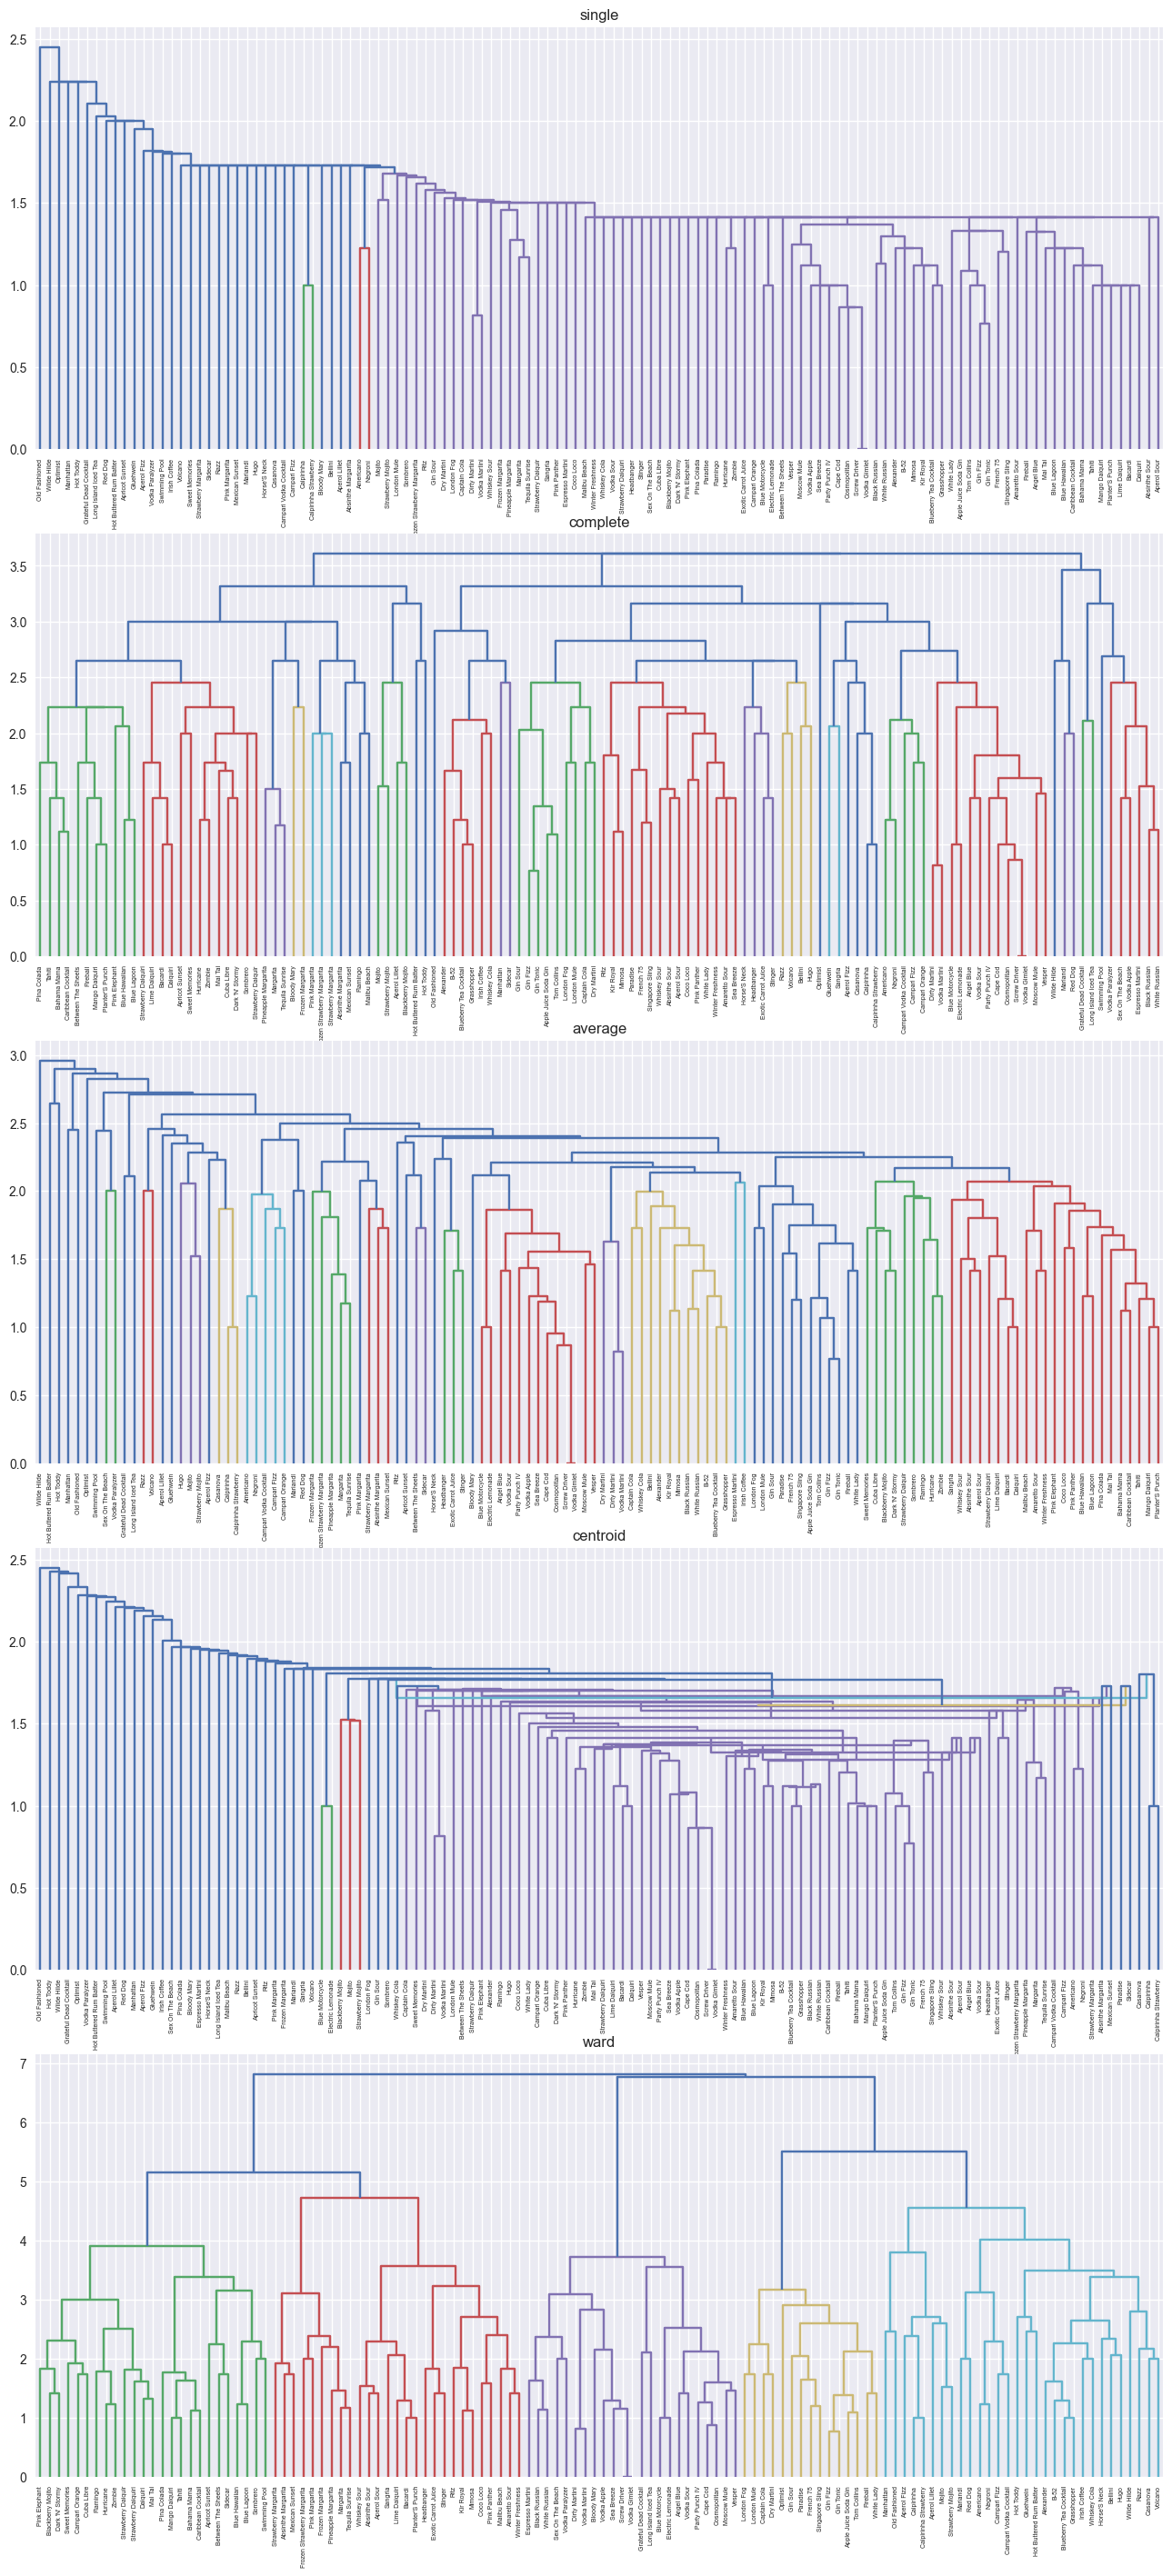

In [717]:
# df2 클러스터링 시각화하기
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']
fig, axes = plt.subplots(nrows=len(linkage_list), ncols=1, figsize=(16, 35))

for link in linkage_list:
    hierarchical_clustering = linkage(df2, method=link)
    dendrogram(hierarchical_clustering, labels=df2.index, ax=axes[linkage_list.index(link)])
    axes[linkage_list.index(link)].set_title(link)

plt.show()


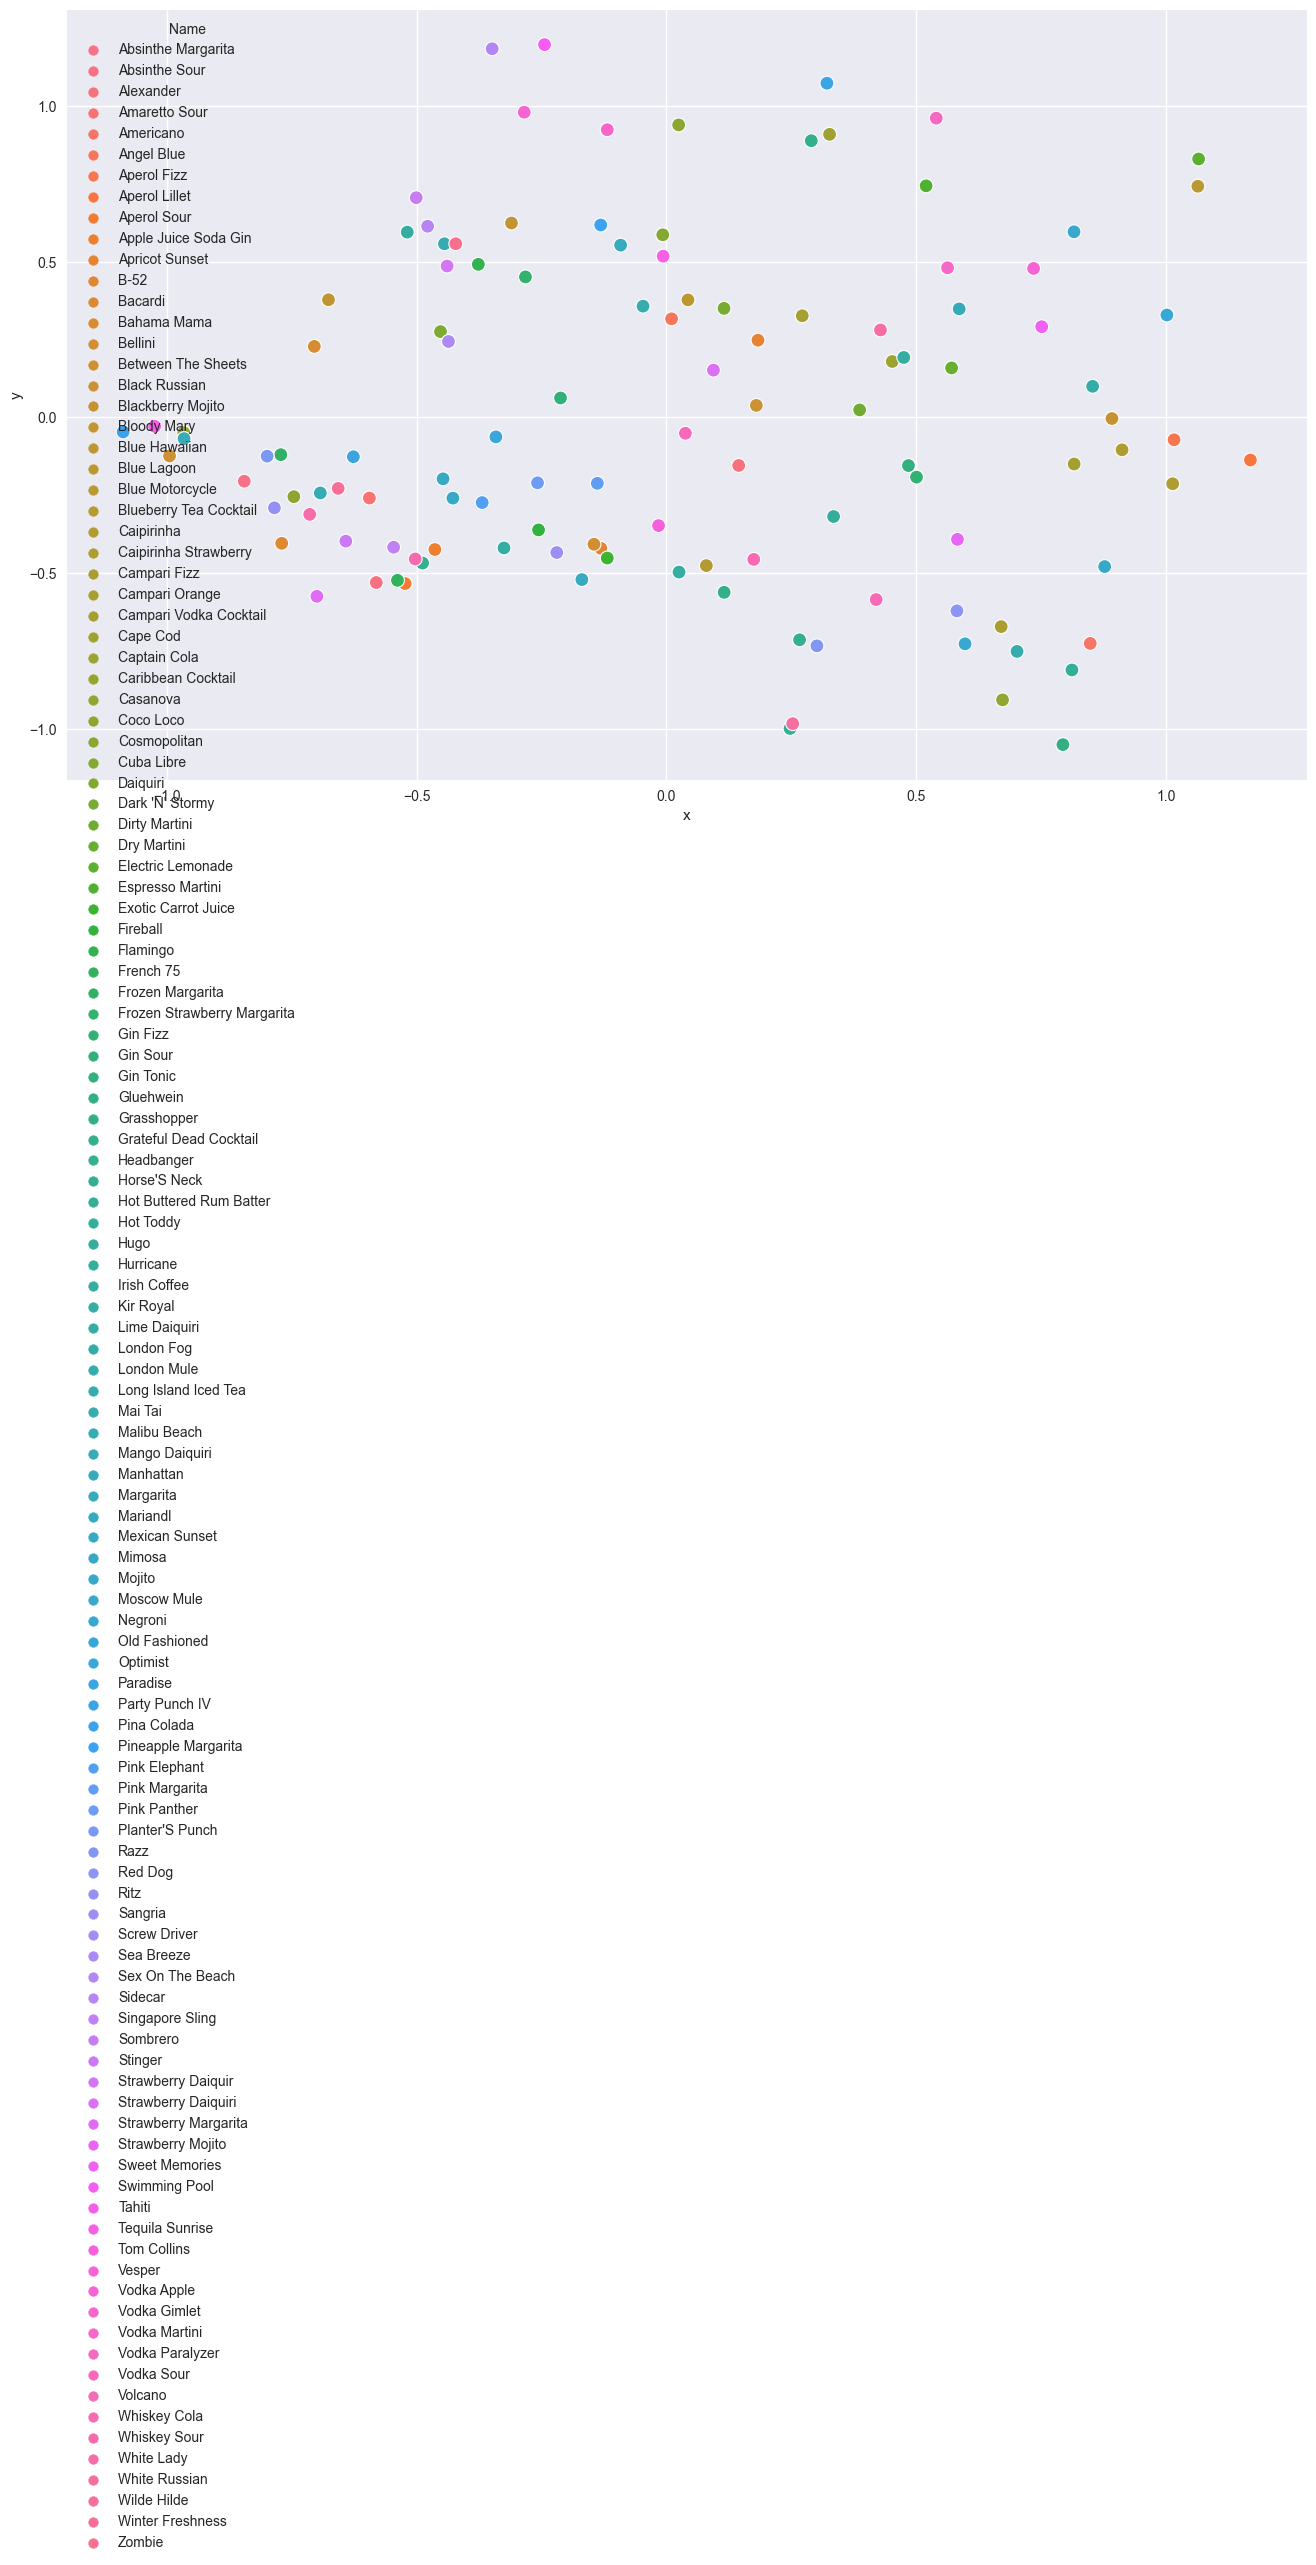

In [718]:
# df2를 2차원 scatter plot으로 나타내기

pca = PCA(n_components=2)
pca.fit(df2)
df2_pca = pca.transform(df2)

df2_pca = pd.DataFrame(df2_pca, columns=['x', 'y'])
df2_pca['Name'] = df2.index

plt.figure(figsize=(16, 10))
sns.scatterplot(x='x', y='y', data=df2_pca, hue='Name', s=100)
plt.show()

C:\Users\gmk_0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gmk_0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gmk_0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gmk_0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

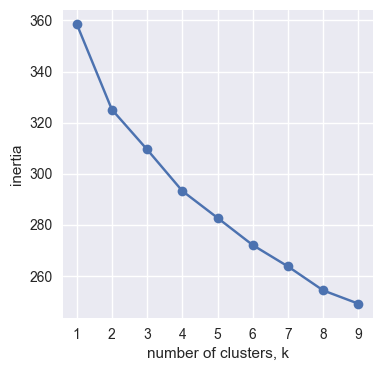

In [719]:
# df2를 kmeans로 클러스터링하기

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df2)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# k=4로 클러스터링하기


In [736]:
# k=4로 클러스터링하기

model = KMeans(n_clusters=4)
model.fit(df2)
labels = model.predict(df2)

df2['cluster'] = labels

centers = model.cluster_centers_
preds = model.predict(df2)

print(pd.DataFrame(centers))
print(preds[:10])


             0         1             2             3             4   \
0  6.451613e-02  0.032258  8.064516e-03  3.225806e-02  1.032258e-01   
1  0.000000e+00  0.200000  2.081668e-17  0.000000e+00  3.200000e-01   
2 -1.734723e-17  0.100000  1.222222e-01 -1.734723e-17  4.444444e-02   
3  0.000000e+00  0.035088  5.263158e-02  5.263158e-02 -2.775558e-17   

             5             6             7             8             9   ...  \
0  4.032258e-02 -1.040834e-17  3.225806e-02  3.225806e-02  1.734723e-18  ...   
1  6.938894e-18  8.000000e-02 -6.938894e-18  0.000000e+00  0.000000e+00  ...   
2  2.222222e-02  2.222222e-02  1.734723e-17 -8.673617e-18  2.222222e-02  ...   
3  6.938894e-18 -3.469447e-18  1.228070e-01  0.000000e+00  0.000000e+00  ...   

             61            62        63            64        65            66  \
0  3.225806e-02 -4.336809e-19  0.032258 -4.336809e-19  0.080645  3.225806e-02   
1  3.000000e-02  4.336809e-19  0.070000  4.336809e-19  0.270000  1.000000e-02   


C:\Users\gmk_0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


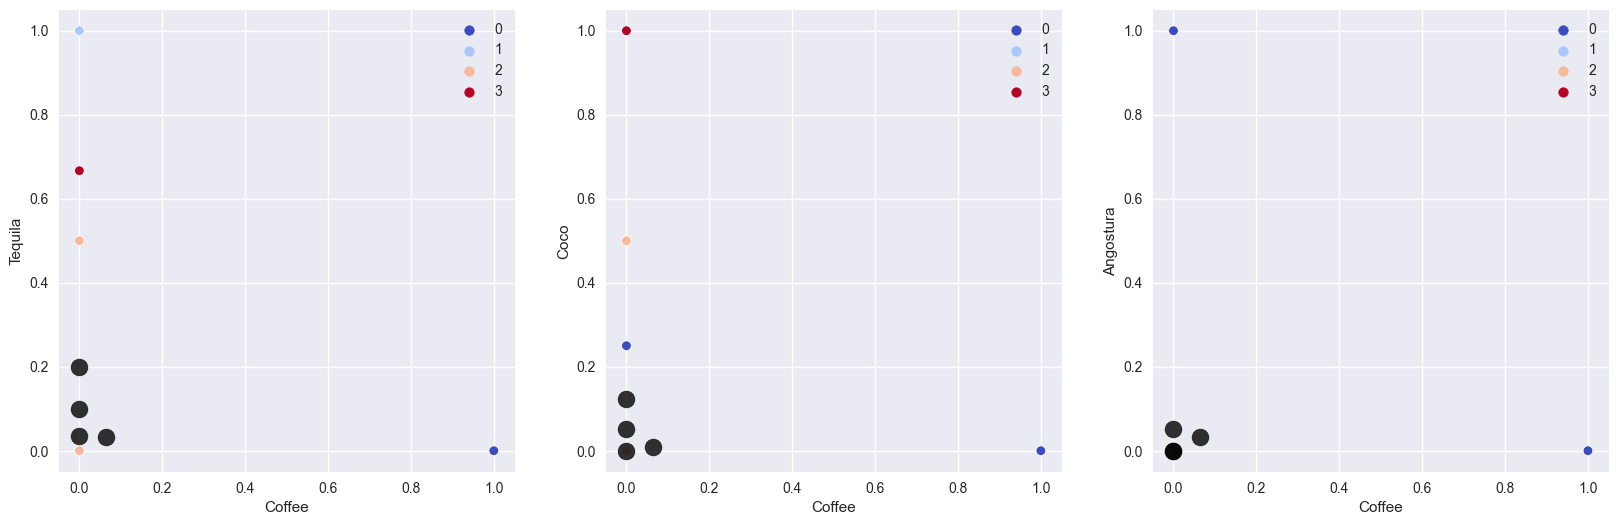

In [737]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = df2.copy()
clust_df['clust'] = preds


plt.figure(figsize=(20, 6))

X = clust_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=df2, hue=model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=df2, hue=model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=df2, hue=model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)

plt.show()

In [687]:
df2

,Coffee,Tequila,Coco,Angostura,Berry,Amaretto,Aperol,Extra Drink,Angostura Bitters,Cognac,...,Mineral Water,Straw,Salt,Curacao White,Rum,Bacardi,Water,Kahlua,Boiling Water,cluster
,,,,,,,,,,,,,,,,,,,,,
Absinthe Margarita,0.0,1.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Absinthe Sour,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Alexander,0.0,0.0,0.25,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
Amaretto Sour,0.0,0.0,0.00,0.0,0.0,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Americano,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Lady,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
White Russian,0.0,0.0,0.00,0.0,0.2,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,3
Wilde Hilde,0.0,0.0,0.00,0.0,1.0,0.00,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


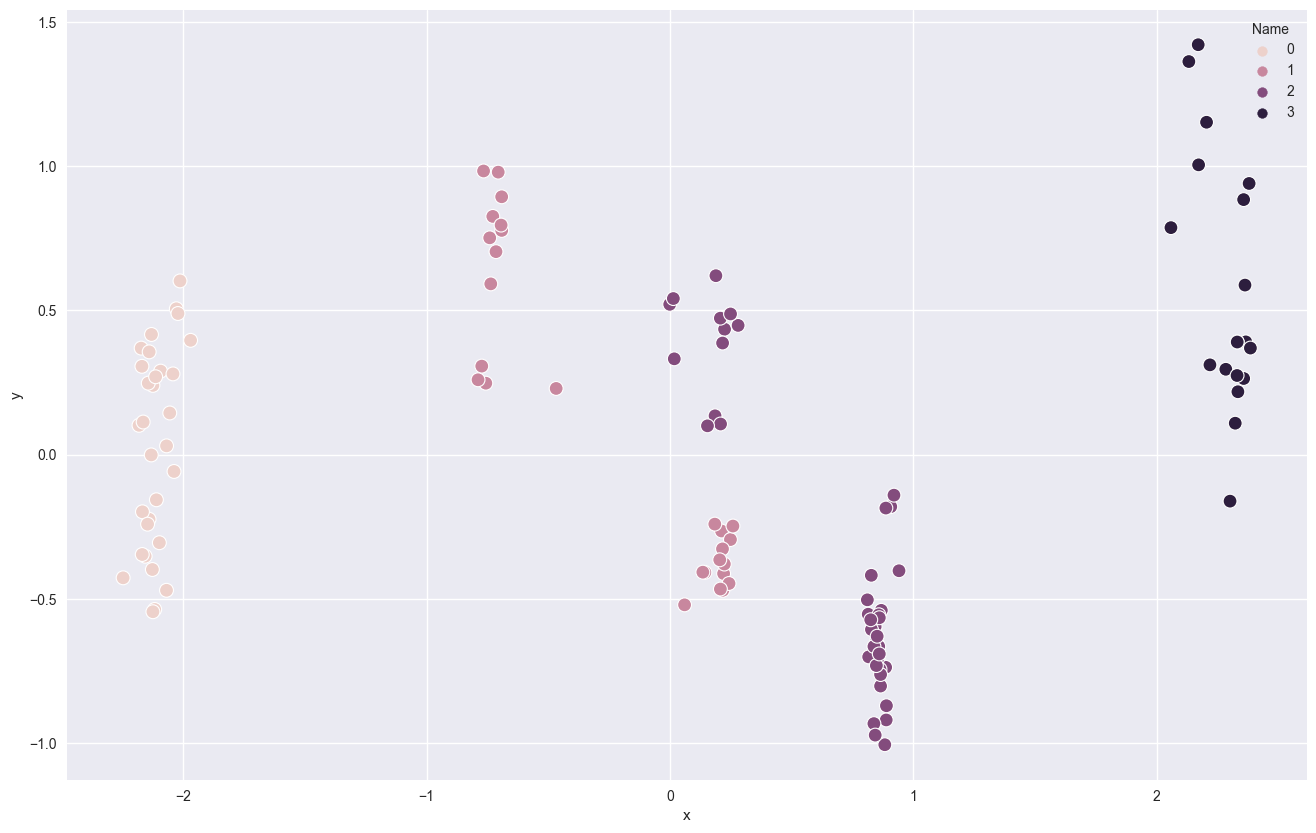

In [747]:
pca = PCA(n_components=2)
pca.fit(clust_df)
clust_df_pca = pca.transform(clust_df)

clust_df_pca = pd.DataFrame(clust_df_pca, columns=['x', 'y'])
clust_df_pca['Name'] = clust_df.clust.to_list()

plt.figure(figsize=(16, 10))
sns.scatterplot(x='x', y='y', data=clust_df_pca, hue='Name', s=100)
plt.show()

In [2]:
import pandas as pd
import numpy as np
import os
from functools import reduce

In [22]:
cur_path = os.getcwd()
cocktail_path = os.path.join(cur_path, '..\\..\\Dataset')

df = pd.read_json(os.path.join(cocktail_path, 'merged_cocktail_list.json'))

df

,ID,Name,AverageRating,Ingredients,Directions,Description,Keywords
0,10136,Alexander,4.5,"[3 cl Whipped Cream , 2 cl Creme de Cacao , 2 ...",[Mix everything well in a cocktail shaker with...,This cocktail alexander recipe makes it all ni...,"[Cocktail Recipes, Creamy, Brandy & Cognac]"
1,10303,Amaretto Sour,4.5,"[5 cl Amaretto , 3 cl Orange Juice , 3 cl Lemo...","[Put all ingredients in a cocktail shaker, add...","For a change of pace, an Amaretto Sour is just...","[Cocktail Recipes, Light Drink, Sour, Cocktail..."
2,10183,Americano,4.3,"[4 cl Vermouth Rosso , 3 cl Campari , 1 dash S...",[Put the orange slice in a tumbler with a few ...,"A sweet cocktail is the Americano, which you c...","[Cocktail Recipes, Liqueurs, Bitter, Light Drink]"
3,10103,Angel Blue,4.6,"[3 cl Vodka , 3 cl Blue Curacao , 10 cl Lemona...",[Mix all ingredients in a shaker with ice cube...,"With curaçao and vodka, the drink turns beauti...","[Cocktail Recipes, Vodka Cocktails, Spritzy, V..."
4,10815,Aperol Fizz,4.4,"[4 cl Aperol , 5 pc Ice Cube , 1 dash Soda Wat...","[Shake Aperol, Lemon Juice and Sugar Syrup and...",Aperol is a liqueur from Italy and is combined...,"[Cocktail Recipes, Liqueurs, Party Cocktails R..."
...,...,...,...,...,...,...,...
93,10319,Whiskey Cola,4.5,"[250 g Cola , 4 cl Whiskey ]",[First pour the whiskey into a glass and then ...,"A whiskey cola is a recipe for whiskey fans, t...","[Cocktail Recipes, Whiskey Cocktails, Party Co..."
94,10669,Whiskey Sour,4.6,"[3 cl Lemon Juice , 5 cl Scotch Whiskey , 2 cl...",[Shake the whiskey with Lemon Juice and Sugar ...,The Whiskey Sour is a classic cocktail and can...,"[Cocktail Recipes, Whiskey Cocktails, Party Co..."
95,10070,White Lady,4.4,"[2 cl Lemon Juice , 2 cl Cointreau , 4 cl Gin ]",[Shake Cointreau with Gin and Lemon Juice well...,Here's a recipe for a tasty cocktail. White La...,"[Cocktail Recipes, Gin Cocktails, Cointreau Co..."
96,10051,White Russian,4.6,"[3 cl Whipped Cream , 3 cl Vodka , 3 cl Coffee...","[Whip cream until frothy, pour 5 Ice Cubes in ...","The famous Russian made with vodka, Kahlua & c...","[Cocktail Recipes, Vodka Cocktails, Cocktails ..."


In [34]:
# cocktail_ingredient_list 만들기
cocktail_ingredients = []

for i in range(len(df)):
    each_ingredient_list = df['Ingredients'][i]
    for ingredient in each_ingredient_list:
        ingredient = ' '.join(ingredient.split(' ')[2:])
        #print(ingredient)
        cocktail_ingredients.append(ingredient)
        #cocktail_ingredients.append(ingredient)
    #each_cocktail_ingredients.append(df['Ingredients'][i])

cocktail_ingredients = list(set(cocktail_ingredients))
print(len(cocktail_ingredients))
print(cocktail_ingredients)

231
['Pineapple Slice (Fresh, in pieces) ', 'Cream of Coconut ', 'sour mix ', 'Lemon (Juice) ', 'Mango Liqueur ', ' orange liqueur (such as Grand Marnier®)', 'Kahlua ', 'Prosecco ', 'Lillet Blanc ', 'Scotch Whiskey ', 'Cointreau ', 'raspberry-flavored liqueur (such as Chambord®) ', 'Grenadine Syrup', 'Green Olive ', 'Apple Slice ', 'whole cloves ', 'Lemonade ', 'Champagne ', 'Almdudler ', 'Sparkling Wine ', 'Vermouth dry ', 'Lemon Spiral (Decoration) ', 'Sugar Syrup ', 'Orange Slice, for decoration', 'Whiskey ', 'Cocoa Liqueur ', 'Cocktail Cherry (Decoration) ', 'Absinthe ', 'orange juice ', 'Champagne (variety of your choice) ', 'Tonic Water ', 'Apricot Brandy ', 'lime ', 'Whipped Cream ', 'Lillet ', 'Blue Curacao', 'lemon slice ', 'cinnamon stick ', 'lemon wedge, for garnish ', 'cranberry juice ', 'lemon-lime flavored carbonated beverage ', 'Coffee Liqueur ', 'Tomato Juice ', 'Lemon slice or Lime slice ', 'Angostura bitters ', 'Cranberry Direct Juice ', 'Coconut Liqueur ', 'Grenadine

In [21]:
data_path = os.path.join(cur_path, '..\\..\\Dataset')
mapper = pd.read_json(os.path.join(data_path, 'cocktail_ingredients_mapper.json')).to_dict()

print(mapper.keys())



dict_keys(['High-Proof Rum', 'Dark Rum (heavy rum)', 'Gold Rum (medium rum)', 'White Rum (light rum)', 'Spiced Rum', 'Vodka', 'Anejo', 'Reposado', 'Blanco', 'Gin', 'Whiskey', 'Red wine', 'White wine', 'Brandy', 'Champagne', 'Beer', 'Cointreau', 'Blue Curacao', 'Dry Vermouth', 'Sweet Vermouth', 'Malibu', 'Kahlua', 'Baileys', 'Disaronno(Amaretto)', 'pumpkin flavored liqueur', 'blackberry liqueur', 'banana liqueur', 'raspberry-flavored liqueur', 'white creme de cacao', 'pineapple juice', 'orange juice', 'lime juice', 'lemon juice', 'cranberry juice', 'lemon-lime flavored carbonated beverage', 'coke', 'Cider', 'sweet and sour', 'ginger beer', 'tonic water', 'water', 'milk', 'orange', 'lime', 'lemon', 'pineapple', 'cocktail(Maraschino) cherries', 'mint', 'olive', 'strawberry', 'grenadine syrup', 'simple syrup', 'Angostura bitters', 'cinnamon stick', 'nutmeg', 'cloves', 'unsalted butter', 'vanilla ice cream', 'Worcestershire sauce', 'tabasco', 'celery', 'espresso', 'ice', 'salt', 'sugar', 'p

In [46]:
etc = []
for ing in cocktail_ingredients:
    for key in mapper.keys():
        if mapper[key] == {}:
            mapper[key] = []

        if key in ing or key.title() in ing or key.lower() in ing:
            mapper[key].append(ing)
            break
        else:
            etc.append(ing)


mapper["etc"] = etc
# 중복 재료 제거
for key in mapper.keys():
    mapper[key] = list(set(mapper[key]))

print(mapper)

{'High-Proof Rum': [], 'Dark Rum (heavy rum)': [], 'Gold Rum (medium rum)': [], 'White Rum (light rum)': [], 'Spiced Rum': [], 'Vodka': ['vodka ', 'Vodka ', 'citron vodka '], 'Anejo': [], 'Reposado': [], 'Blanco': [], 'Gin': ['Ginger Beer ', 'London Dry Gin ', 'Gin ', 'Ginger Beer, to fill up ', 'Captain Morgan Original Spiced ', 'gin', 'gin ', 'Ginger Ale '], 'Whiskey': ['bourbon whiskey ', 'whiskey ', 'Whiskey ', 'Scotch Whiskey ', 'rye whiskey '], 'Red wine': ['dry red wine ', 'red wine '], 'White wine': [], 'Brandy': ['Cherry Brandy or Kirschlikör ', 'Cognac or Brandy ', 'Apricot Brandy ', 'Brandy '], 'Champagne': ['Champagne (variety of your choice) ', 'Champagne or Sparkling Wine', 'Champagne ', 'Champagne for topping up '], 'Beer': [], 'Cointreau': ['Cointreau '], 'Blue Curacao': ['Blue Curacao', 'Blue Curacao '], 'Dry Vermouth': [], 'Sweet Vermouth': ['sweet vermouth '], 'Malibu': ['Malibu ', 'Malibu Coconut Liqueur '], 'Kahlua': ['Kahlua '], 'Baileys': [], 'Disaronno(Amaretto)

In [49]:
# mapper를 json 파일로 저장하기

with open(os.path.join(data_path, 'cocktail_ingredients_mapper.json'), 'w', encoding='utf-8') as f:
    json.dump(mapper, f, ensure_ascii=False, indent=4)

In [4]:
import os
import pandas as pd
import json

In [43]:
data_path = os.path.join(os.getcwd(), '..\\..\\Dataset')

mapper = json.load(open(os.path.join(data_path, 'cocktail_ingredients_mapper_new.json'), 'r', encoding='utf-8'))

print(mapper)

{'Rum': ['rum ', 'rum'], 'High-Proof Rum': ['Rum (Overproof Rum) '], 'Dark Rum (heavy rum)': ['Rum, Dark '], 'Gold Rum (medium rum)': ['Rum, Brown ', 'Braunen Rum, e.g. Captain Morgan or Bacardi Gold ', 'Brown Rum '], 'White Rum (light rum)': ['Rum (White, e.g. Bacardi or Havana Club) ', 'light rum ', 'Rum, White ', 'Bacardi Rum '], 'Spiced Rum': ['Captain Morgan Original Spiced '], 'Cachaca ': ['Cachaca ', 'Cachaca (Pitù) '], 'Vodka': ['vodka ', 'Vodka ', 'citron vodka '], 'Tequila': ['Tequila ', 'tequila', 'tequila '], 'Anejo': [], 'Reposado': [], 'Blanco': [], 'Gin': ['London Dry Gin ', 'Gin ', 'gin', 'gin '], 'Whiskey': ['bourbon whiskey ', 'Bourbon ', 'whiskey ', 'Whiskey ', 'Scotch Whiskey ', 'rye whiskey '], 'Apricot Brandy': ['Apricot Brandy '], 'Cherry Brandy': ['Cherry Brandy or Kirschlikör '], 'Red wine': ['dry red wine ', 'red wine '], 'Lillet Blanc': ['Lillet Blanc '], 'White wine': [], 'Brandy': ['Cognac or Brandy ', 'Brandy ', 'Cognac '], 'Champagne': ['Champagne (variet

In [44]:
new_mapper = {}
for key in mapper.keys():
    for ing in mapper[key]:
        ing = ing.strip(' ')
        new_mapper[ing.lower()] = key.lower()

In [ ]:
merged_df = pd.read_json(os.path.join(data_path, 'merged_cocktail_list.json'))

merged_df['Ingredients']

for i in range(len(merged_df)):
    for j in range(len(merged_df['Ingredients'][i])):
        print(merged_df['Ingredients'][i][j])
        ingredient = ' '.join(merged_df['Ingredients'][i][j].split(' ')[2:])
        ingredient = ingredient.strip(' ')
        mapped_ingredient = new_mapper[ingredient.lower()]
        mapped_direction = ' '.join(merged_df['Ingredients'][i][j].split(' ')[:2]) + ' ' + mapped_ingredient
        print(mapped_direction)
        merged_df['Ingredients'][i][j] = mapped_direction
        

In [69]:
merged_df.to_json(os.path.join(data_path, 'merged_cocktail_list_new.json'), orient='records', force_ascii=False, indent=4)

In [87]:
merged_df = pd.read_json(os.path.join(data_path, 'merged_cocktail_list_new.json'))

In [88]:
units = []

for i in range(len(merged_df)):
    for j in range(len(merged_df['Ingredients'][i])):
        unit = merged_df['Ingredients'][i][j].split(' ')[1]
        units.append(unit)
        if unit == 'cocktail':
            print(merged_df['Ingredients'][i][j])

units = list(set(units))
units.sort()
print(units)

['Scoop', 'Spr', 'Sprig', 'cup', 'dash', 'fluid_ounce', 'g', 'l', 'ml', 'ounce', 'pc', 'pinch', 'sheet', 'shot', 'tablespoon', 'teaspoon']


In [89]:
# 1. 레시피 데이터 불러오기

import os

cur_path = os.getcwd()